# Star Hotel

## Background

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:

* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. Star Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Key questions

1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

## Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

### Data Dictionary

* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by Star Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [176]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")


# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    precision_recall_curve,
    roc_curve,
    roc_auc_score,
)



The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Data Overview

In [177]:
data1 = pd.read_csv("StarHotelsGroup.csv")  # Read dataset

<IPython.core.display.Javascript object>

In [178]:
data = (
    data1  # Copying dataset to another variable to avoid any changes to original data
)

<IPython.core.display.Javascript object>

In [179]:
data.head()  # First 5 observations

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,3,0,0,3,Not Selected,0,Room_Type 1,277,2019,7,13,Online,0,0,0,89.10,2,Canceled


<IPython.core.display.Javascript object>

* There is no unique ID for each guest

In [180]:
data.shape  # Shape of dataset

(56926, 18)

<IPython.core.display.Javascript object>

* There are 56,926 rows and 18 columns


In [181]:
data.info()  # Checking info of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          56926 non-null  int64  
 1   no_of_children                        56926 non-null  int64  
 2   no_of_weekend_nights                  56926 non-null  int64  
 3   no_of_week_nights                     56926 non-null  int64  
 4   type_of_meal_plan                     56926 non-null  object 
 5   required_car_parking_space            56926 non-null  int64  
 6   room_type_reserved                    56926 non-null  object 
 7   lead_time                             56926 non-null  int64  
 8   arrival_year                          56926 non-null  int64  
 9   arrival_month                         56926 non-null  int64  
 10  arrival_date                          56926 non-null  int64  
 11  market_segment_

<IPython.core.display.Javascript object>

* All columns have same number of values.

In [182]:
data.duplicated().sum()  # Checking for duplicates

14350

<IPython.core.display.Javascript object>

* There are 14350 duplicated rows. Since the rows do not have any unique ID, we can drop all these rows.

In [183]:
data.drop_duplicates(inplace=True)  # Deleting duplicated rows

<IPython.core.display.Javascript object>

In [184]:
data.isnull().values.any()  # Checking for null values

False

<IPython.core.display.Javascript object>

* There are no null values.

In [185]:
data.describe(include="all")  # Data description for all columns

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,42576.000000,42576.000000,42576.000000,42576.000000,42576,42576.000000,42576,42576.000000,42576.000000,42576.000000,42576.000000,42576,42576.000000,42576.000000,42576.000000,42576.000000,42576.000000,42576
unique,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,NaN,NaN,NaN,NaN,31863,NaN,29730,NaN,NaN,NaN,NaN,34169,NaN,NaN,NaN,NaN,NaN,28089
mean,1.916737,0.142146,0.895270,2.321167,NaN,0.034362,NaN,77.315953,2018.297891,6.365488,15.682873,NaN,0.030886,0.025413,0.222731,112.375800,0.768109,NaN
std,0.527524,0.459920,0.887864,1.519328,NaN,0.182160,NaN,77.279616,0.626126,3.051924,8.813991,NaN,0.173011,0.358194,2.242308,40.865896,0.837264,NaN
min,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,16.000000,2018.000000,4.000000,8.000000,NaN,0.000000,0.000000,0.000000,85.500000,0.000000,NaN
50%,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,53.000000,2018.000000,6.000000,16.000000,NaN,0.000000,0.000000,0.000000,107.000000,1.000000,NaN
75%,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,118.000000,2019.000000,9.000000,23.000000,NaN,0.000000,0.000000,0.000000,135.000000,1.000000,NaN


<IPython.core.display.Javascript object>

* Number of rows after removing duplicates is 42,576.
* Minimum number of adults is 0. Hotels will not give rooms to guests with no adults. Some error is there in this column.
* Minimum number of weekend nights is 0 which means some guests have stayed only during weekdays.
* Minimum number of week nights is 0 which means some guests have stayed only during weekends.
* Maximum number of weekend nights is 8 which means some guests have stayed for 4 weekends ( atleast 3 weeks ).
* Maximum number of weekday nights is 17 which means some guests have stayed for atleast 3 weeks.
* Meal plan 1 and Room type 1 are most chosen.
* Minimum lead time is 0 which means guests have booked and arrived at the same day. Average is 77 days while maximum is 521 days, so there are outliers.
* MAximum number of previous bookings not cancelled is 72 which means there is atleast 1 guest who has come 72 times before. 
* Minimum average price/room is 0. There could be a special category for rooms with this price. Average price is 112 while maximum is 540.
* More than 50% of bookings have not been cancelled.

## EDA

### Univariate Analysis

In [186]:
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    p = sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="g", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.show()

<IPython.core.display.Javascript object>

In [187]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.2f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

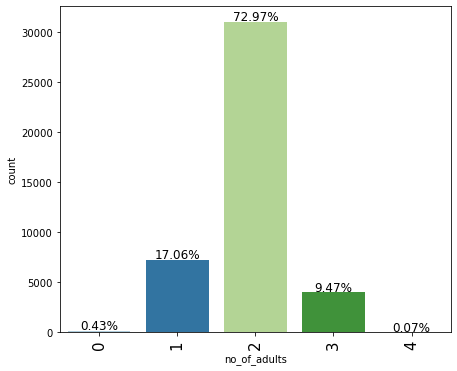

<IPython.core.display.Javascript object>

In [188]:
labeled_barplot(data, "no_of_adults", perc=True)

* Mostly 2 adults have stayed.
* Some bookings have 0 adults.

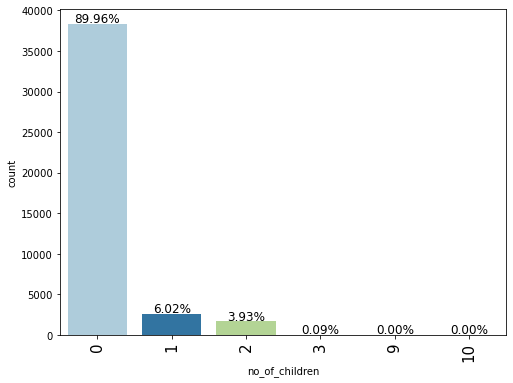

<IPython.core.display.Javascript object>

In [189]:
labeled_barplot(data, "no_of_children", perc=True)

In [190]:
data["no_of_children"].sum() / (
    data["no_of_adults"].sum() + data["no_of_children"].sum()
) * 100

6.904025827353723

<IPython.core.display.Javascript object>

In [191]:
data["no_of_adults"].sum() / (
    data["no_of_adults"].sum() + data["no_of_children"].sum()
) * 100

93.09597417264628

<IPython.core.display.Javascript object>

* 7% of guests are children.
* 93% of guests are adults.

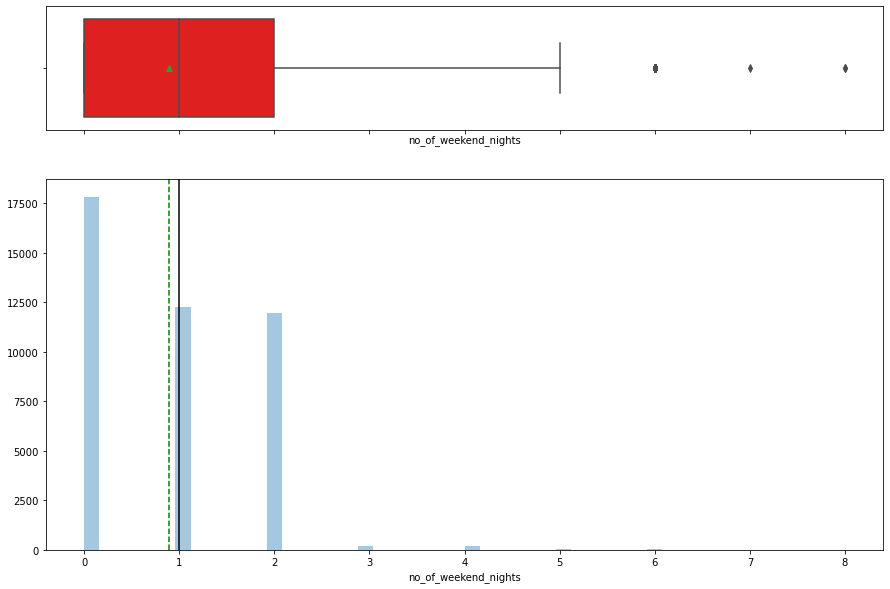

<IPython.core.display.Javascript object>

In [192]:
histogram_boxplot(data["no_of_weekend_nights"])

* Average number of weekend nights is 1. Many guests have not stayed for the whole weekend.

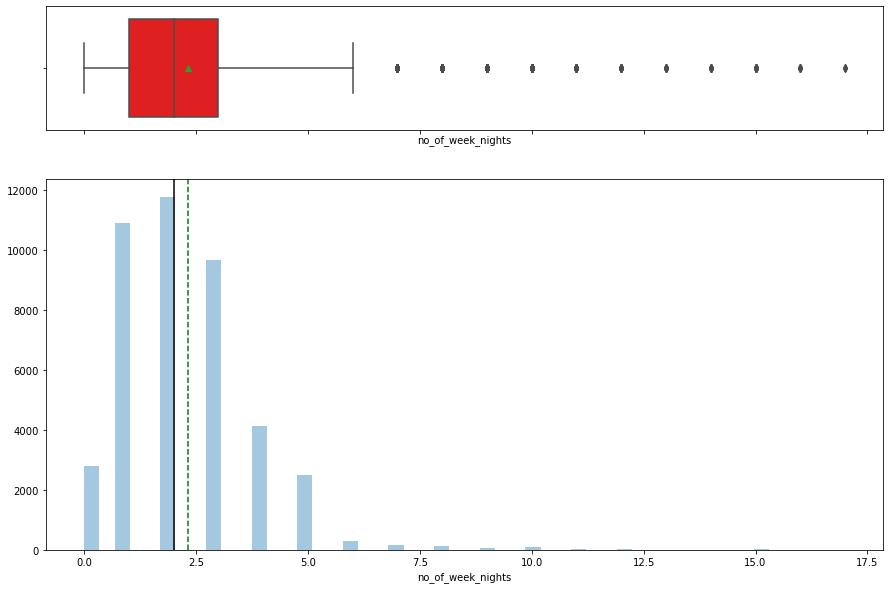

<IPython.core.display.Javascript object>

In [193]:
histogram_boxplot(data["no_of_week_nights"])

* Average week nights is 2.

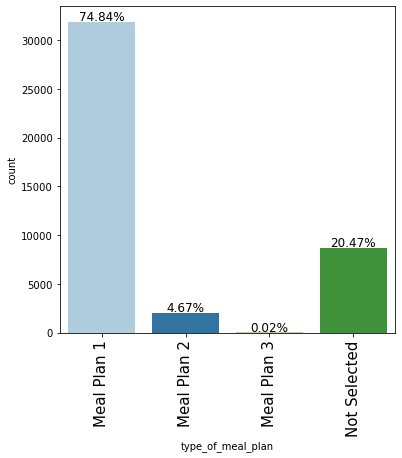

<IPython.core.display.Javascript object>

In [194]:
labeled_barplot(data, "type_of_meal_plan", perc=True)

* Meal plan 1 is the most chosen meal.

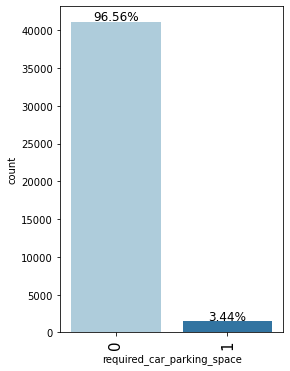

<IPython.core.display.Javascript object>

In [195]:
labeled_barplot(data, "required_car_parking_space", perc=True)

* 97% of guests don't require car parking space.

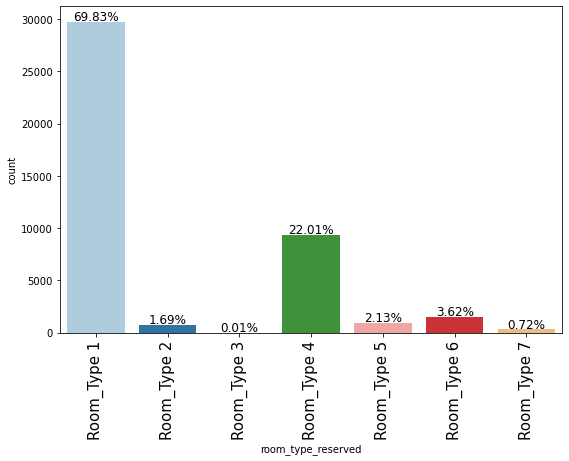

<IPython.core.display.Javascript object>

In [196]:
labeled_barplot(data, "room_type_reserved", perc=True)

* Room type 1 is the most chosen room.

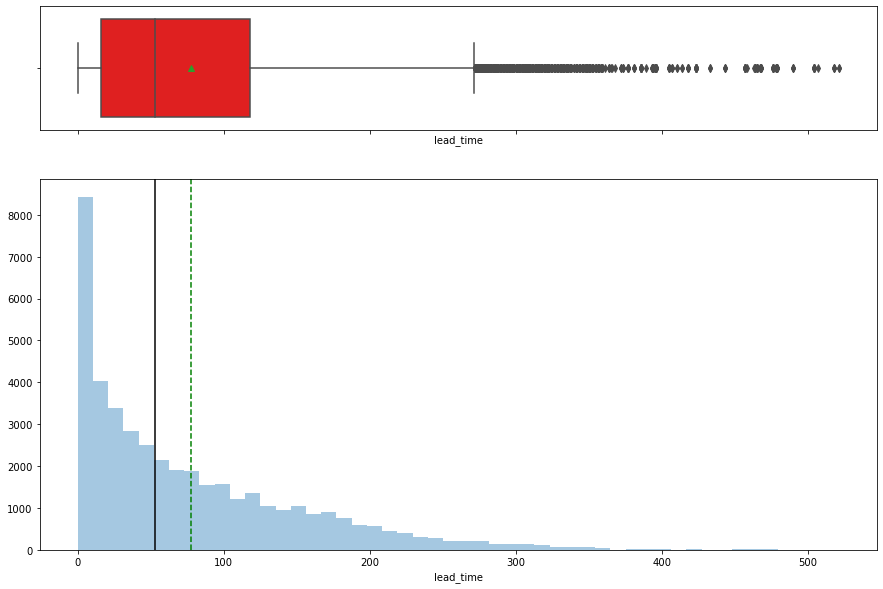

<IPython.core.display.Javascript object>

In [197]:
histogram_boxplot(data["lead_time"])

* Lead time varies from 0 to greater than 500.
* Average lead time is less than 100 days ( about 3 months ).
* There are many outliers.

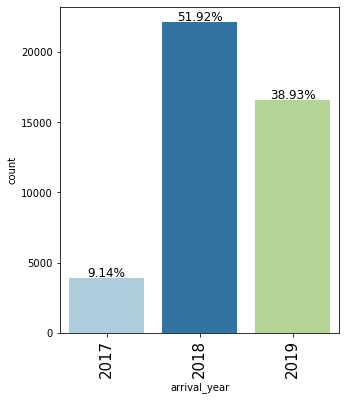

<IPython.core.display.Javascript object>

In [198]:
labeled_barplot(data, "arrival_year", perc=True)

* Most of the guests have arrived in 2018 and 2019.

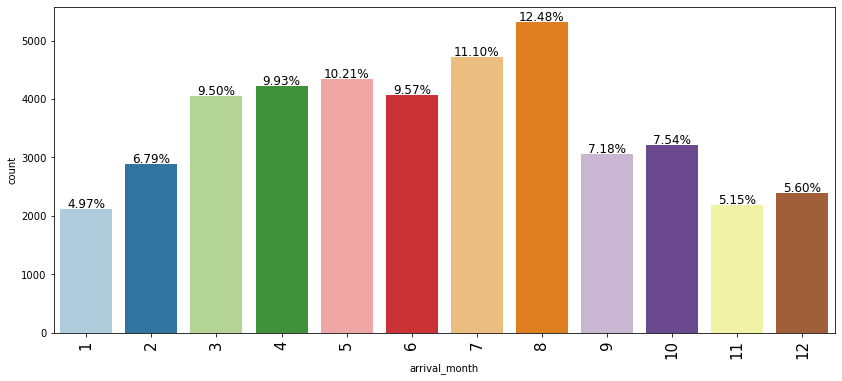

<IPython.core.display.Javascript object>

In [199]:
labeled_barplot(data, "arrival_month", perc=True)

* Most common arrival month is August followed by July.
* Least common are January and November.

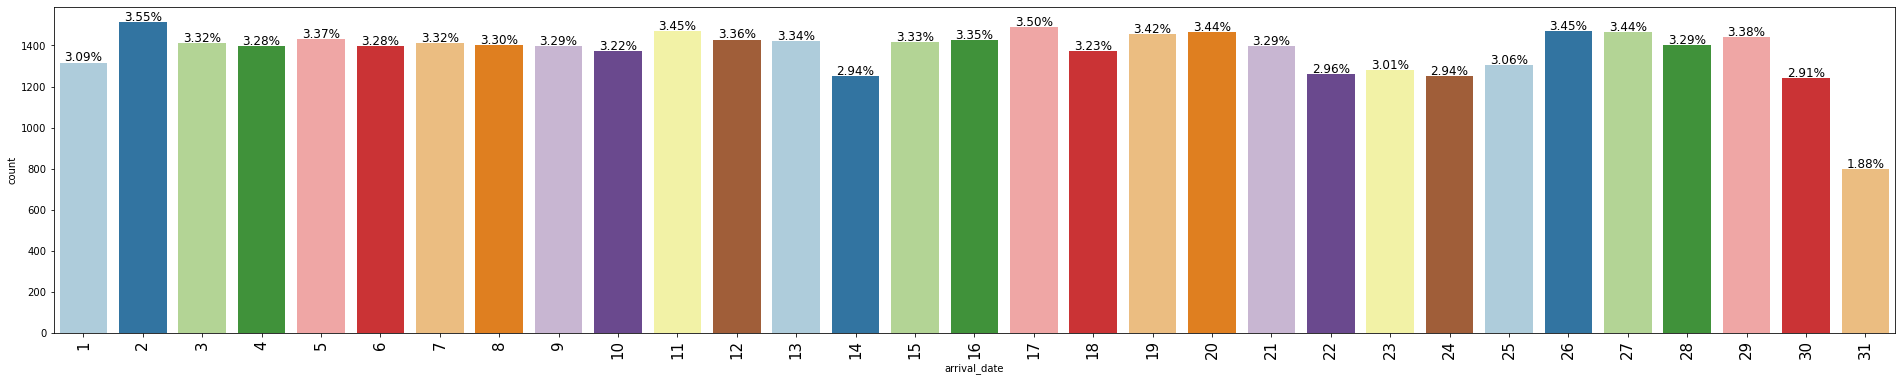

<IPython.core.display.Javascript object>

In [200]:
labeled_barplot(data, "arrival_date", perc=True)

* Almost all dates have equal % of occurances.

In [201]:
x = data.groupby("arrival_month")["arrival_date"].sum()
x

arrival_month
1     32886
2     44784
3     65182
4     66527
5     68119
6     64797
7     74367
8     83416
9     45384
10    50758
11    31558
12    39936
Name: arrival_date, dtype: int64

<IPython.core.display.Javascript object>

#### Which market segment do most of the guests come from?

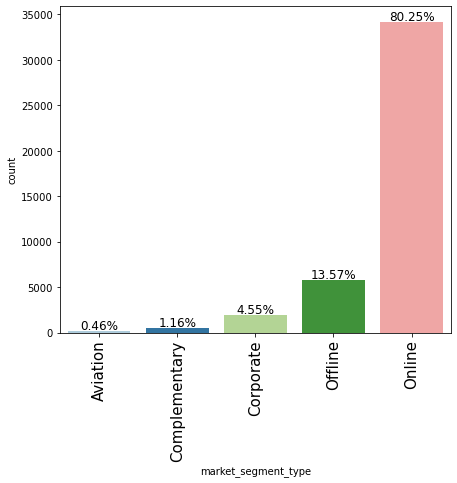

<IPython.core.display.Javascript object>

In [202]:
labeled_barplot(data, "market_segment_type", perc=True)

#### Most of the guests come from the Online segment

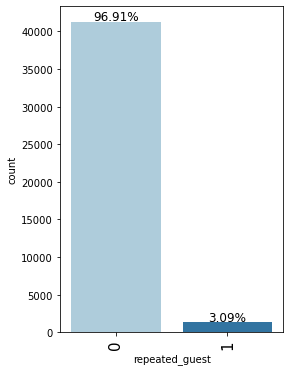

<IPython.core.display.Javascript object>

In [203]:
labeled_barplot(data, "repeated_guest", perc=True)

* 97% of the guests are new guests.

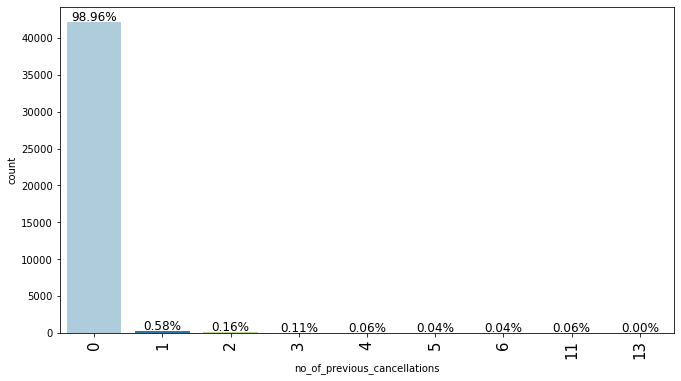

<IPython.core.display.Javascript object>

In [204]:
labeled_barplot(data, "no_of_previous_cancellations", perc=True)

* 99% of guests have not made previous cancellations.

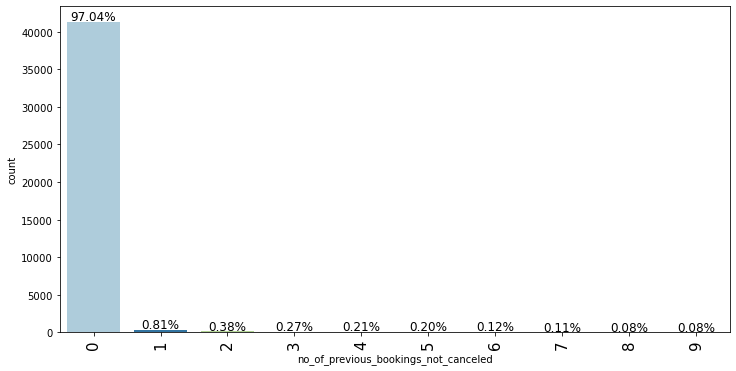

<IPython.core.display.Javascript object>

In [205]:
labeled_barplot(data, "no_of_previous_bookings_not_canceled", n=10, perc=True)

* 97% of guests have 0 previous bookings not cancelled. This means they are all new guests booking for the 1st time. 

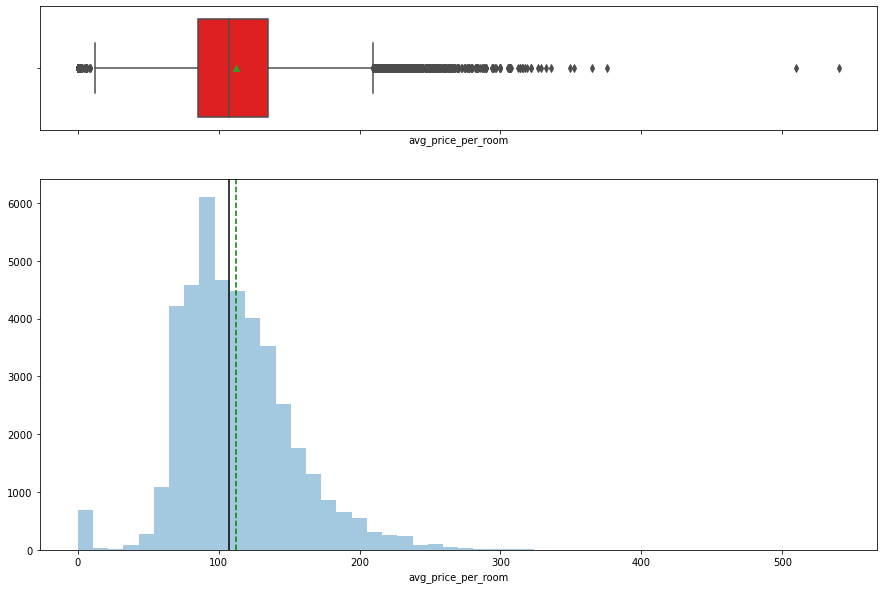

<IPython.core.display.Javascript object>

In [206]:
histogram_boxplot(data["avg_price_per_room"])

* Average price per room is about 100.
* Minimum price is 0. This could be for a special category of guests or some error.
* Maximum is above 500. There are many outliers.

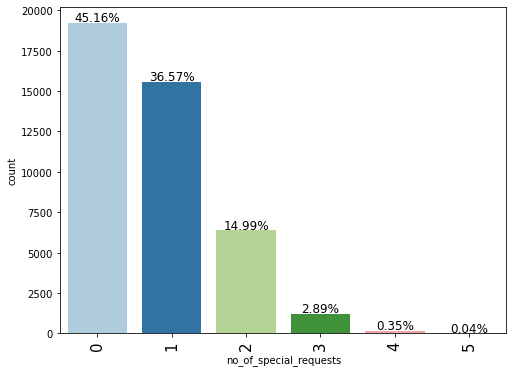

<IPython.core.display.Javascript object>

In [207]:
labeled_barplot(data, "no_of_special_requests", perc=True)

* About 45% of guests have no special requests.

#### What percentage of bookings are canceled?

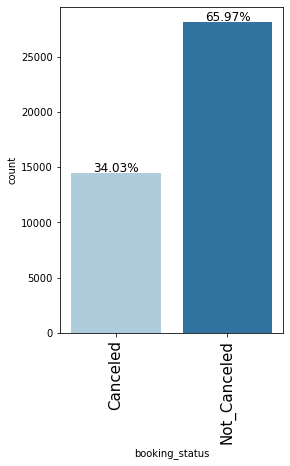

<IPython.core.display.Javascript object>

In [208]:
labeled_barplot(data, "booking_status", perc=True)

#### 34% of the bookings are cancelled

## Bivariate Analysis

In [209]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

<AxesSubplot:>

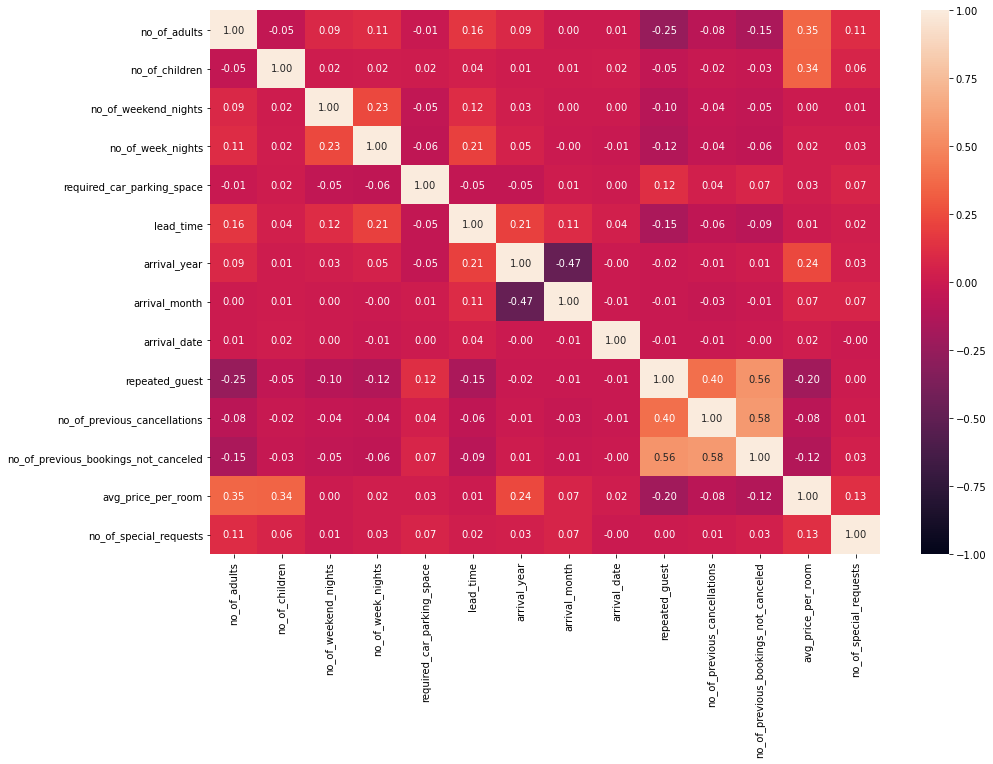

<IPython.core.display.Javascript object>

In [210]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")

* There is no high correlation (positive or negative) between any variables.
* Target variable "booking_status" is not numeric so it is not present in the correlation heatmap.
* There is some positive correlation between no_of_previous_cancellations and no_of_previous_bookings_not_cancelled.
* There is also negative correlation between arrival_year and arrival_month.

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                14487         28089  42576
2                  10998         20071  31069
3                   1813          2218   4031
1                   1589          5675   7264
0                     76           108    184
4                     11            17     28
------------------------------------------------------------------------------------------------------------------------


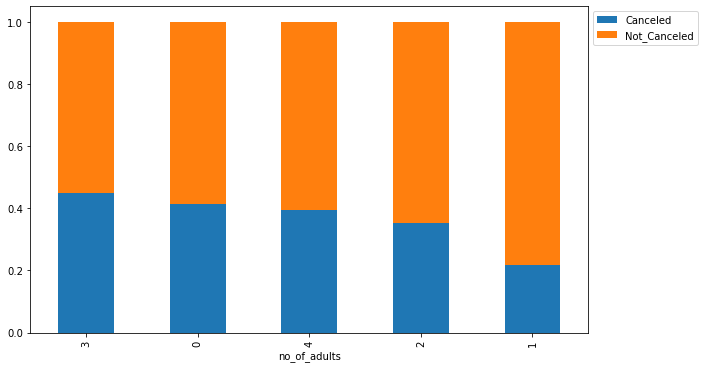

<IPython.core.display.Javascript object>

In [211]:
stacked_barplot(data, "no_of_adults", "booking_status")

* In all cases about 40% of the bookings have been cancelled.

booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                14487         28089  42576
0                  12580         25720  38300
1                   1009          1552   2561
2                    883           790   1673
3                     14            25     39
9                      1             1      2
10                     0             1      1
------------------------------------------------------------------------------------------------------------------------


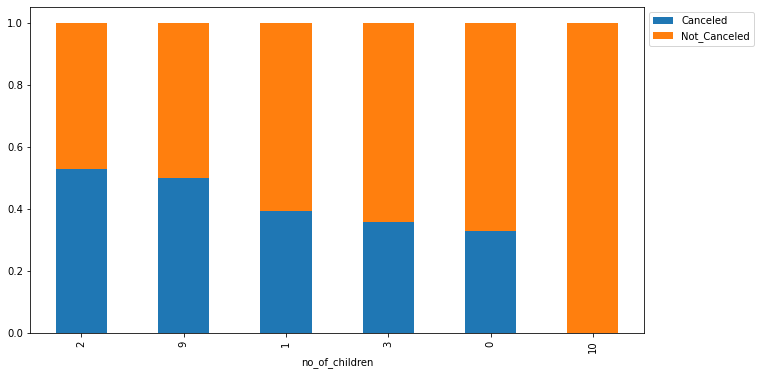

<IPython.core.display.Javascript object>

In [212]:
stacked_barplot(data, "no_of_children", "booking_status")

* 1 booking with 10 children has not cancelled. 
* Bookings with no children have the highest number of cancellations. 

booking_status                Canceled  Not_Canceled    All
no_of_previous_cancellations                               
All                              14487         28089  42576
0                                14477         27655  42132
1                                    8           241    249
3                                    1            46     47
13                                   1             0      1
2                                    0            66     66
4                                    0            24     24
5                                    0            16     16
6                                    0            16     16
11                                   0            25     25
------------------------------------------------------------------------------------------------------------------------


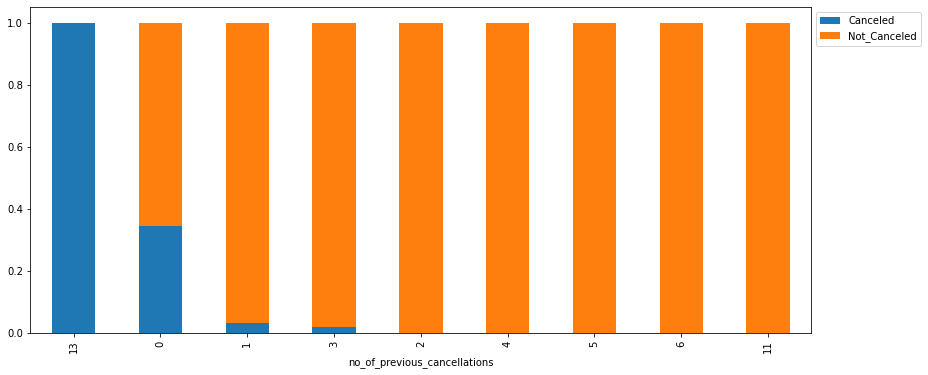

<IPython.core.display.Javascript object>

In [213]:
stacked_barplot(data, "no_of_previous_cancellations", "booking_status")

* 1 booking with 13 previous cancelations has been cancelled again. 
* Otherwise no of previous canceltions does not have an effect on booking status. Most of them have not cancelled.

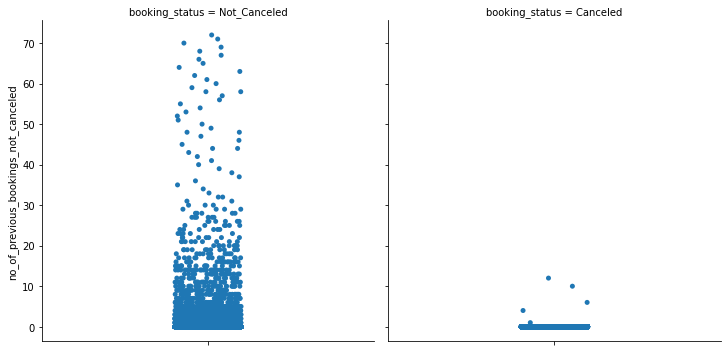

<IPython.core.display.Javascript object>

In [214]:
sns.catplot(data=data, y="no_of_previous_bookings_not_canceled", col="booking_status")

* Most of the guests with previous booking not canceled have not canceled now also.
* Most of those who have canceled have 0 previous bookings not cancelled (new guests).

booking_status        Canceled  Not_Canceled    All
no_of_weekend_nights                               
All                      14487         28089  42576
0                         5630         12199  17829
2                         4417          7570  11987
1                         4130          8130  12260
4                          148            68    216
3                          117           103    220
5                           21             9     30
6                           21            10     31
8                            2             0      2
7                            1             0      1
------------------------------------------------------------------------------------------------------------------------


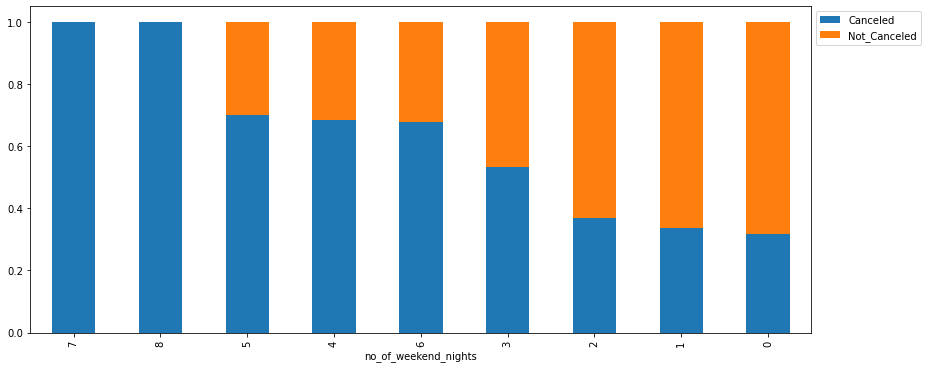

<IPython.core.display.Javascript object>

In [215]:
stacked_barplot(data, "no_of_weekend_nights", "booking_status")

* Bookings with 7 or 8 weekend nights have been cancelled.
* About 70% of bookings with 4,5, or 6 nights have been cancelled.
* About 40% of bookings with 0-2 nights have been cancelled.

booking_status     Canceled  Not_Canceled    All
no_of_week_nights                               
All                   14487         28089  42576
2                      3979          7785  11764
3                      3483          6177   9660
1                      3038          7868  10906
4                      1704          2432   4136
5                      1104          1401   2505
0                       691          2106   2797
6                       161           140    301
7                        90            75    165
10                       79            15     94
8                        74            47    121
9                        29            19     48
11                       17             3     20
12                       11             5     16
15                        8             6     14
13                        7             2      9
14                        5             5     10
16                        5             2      7
17                  

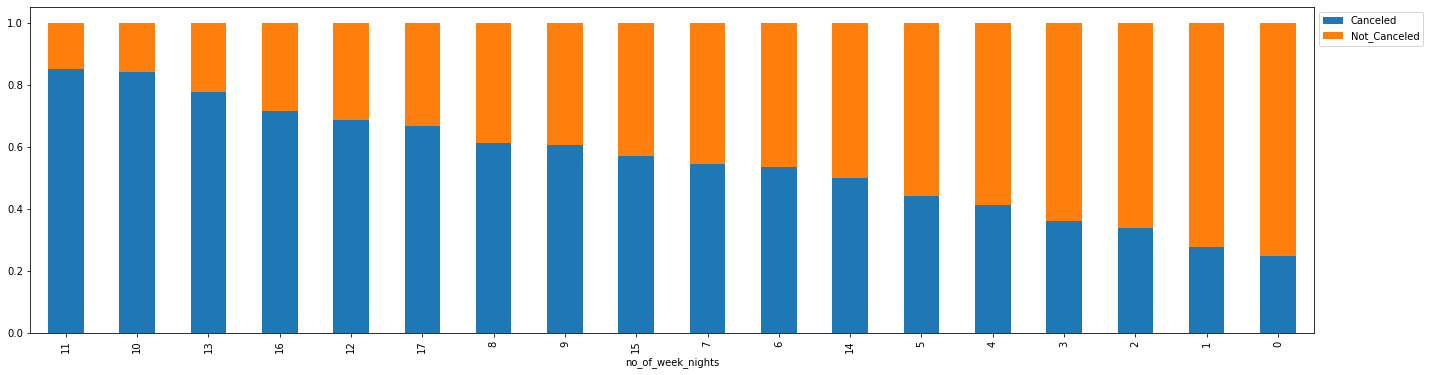

<IPython.core.display.Javascript object>

In [216]:
stacked_barplot(data, "no_of_week_nights", "booking_status")

* Cancellations vary across number of week nights booked. Bookings with 2 week nights have been cancelled the most.

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   14487         28089  42576
Meal Plan 1           10511         21352  31863
Not Selected           3118          5598   8716
Meal Plan 2             857          1132   1989
Meal Plan 3               1             7      8
------------------------------------------------------------------------------------------------------------------------


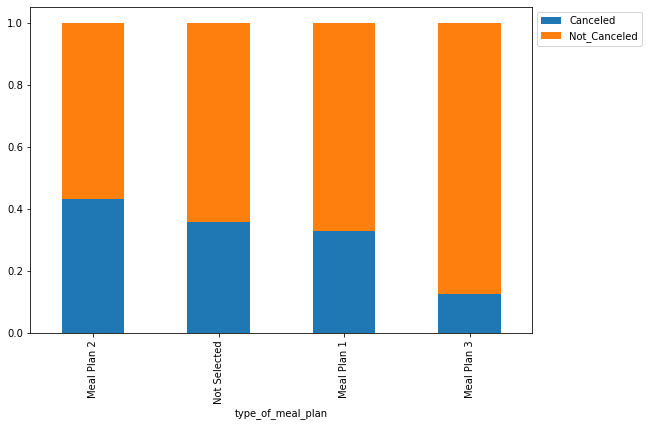

<IPython.core.display.Javascript object>

In [217]:
stacked_barplot(data, "type_of_meal_plan", "booking_status")

* Meal Plan 1 is the most common plan chosen and also the most common with cancelled bookings.

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            14487         28089  42576
0                              14307         26806  41113
1                                180          1283   1463
------------------------------------------------------------------------------------------------------------------------


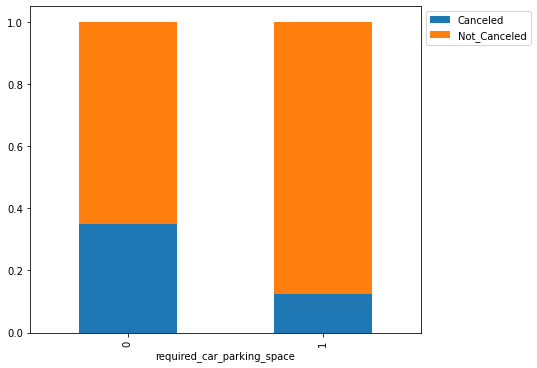

<IPython.core.display.Javascript object>

In [218]:
stacked_barplot(data, "required_car_parking_space", "booking_status")

* Most of the bookings do not need car parking space.
* number of cancellations is only 180 because of required parking space.

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    14487         28089  42576
Room_Type 1             9225         20505  29730
Room_Type 4             3683          5686   9369
Room_Type 6              826           714   1540
Room_Type 5              367           539    906
Room_Type 2              274           444    718
Room_Type 7              110           197    307
Room_Type 3                2             4      6
------------------------------------------------------------------------------------------------------------------------


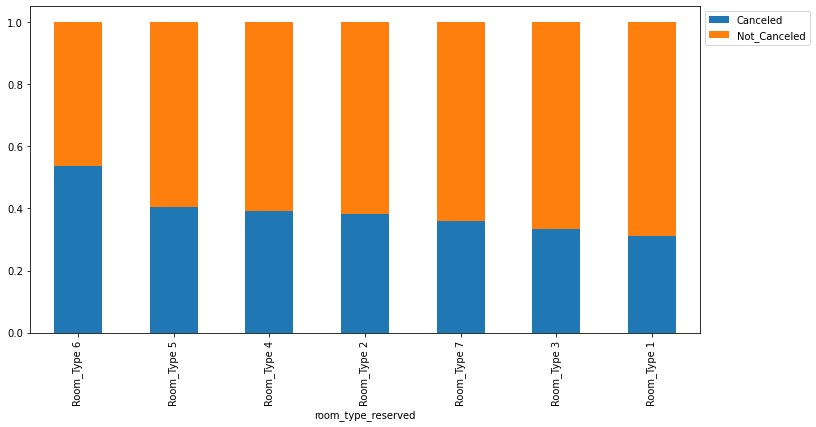

<IPython.core.display.Javascript object>

In [219]:
stacked_barplot(data, "room_type_reserved", "booking_status")

* All rooms have similar proportion of cancellations. 
* Room type 1 is the most common room and also the one with most number of cancellations.

<AxesSubplot:xlabel='booking_status', ylabel='lead_time'>

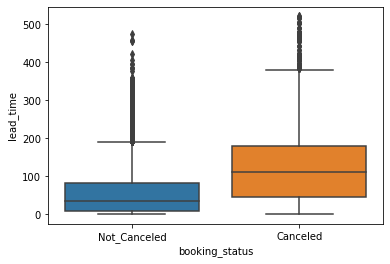

<IPython.core.display.Javascript object>

In [220]:
sns.boxplot(data["booking_status"], data["lead_time"])

* More number of bookings have been cancelled based on lead time.
* Bookings with very high lead time have been cancelled.

<AxesSubplot:xlabel='arrival_date', ylabel='Count'>

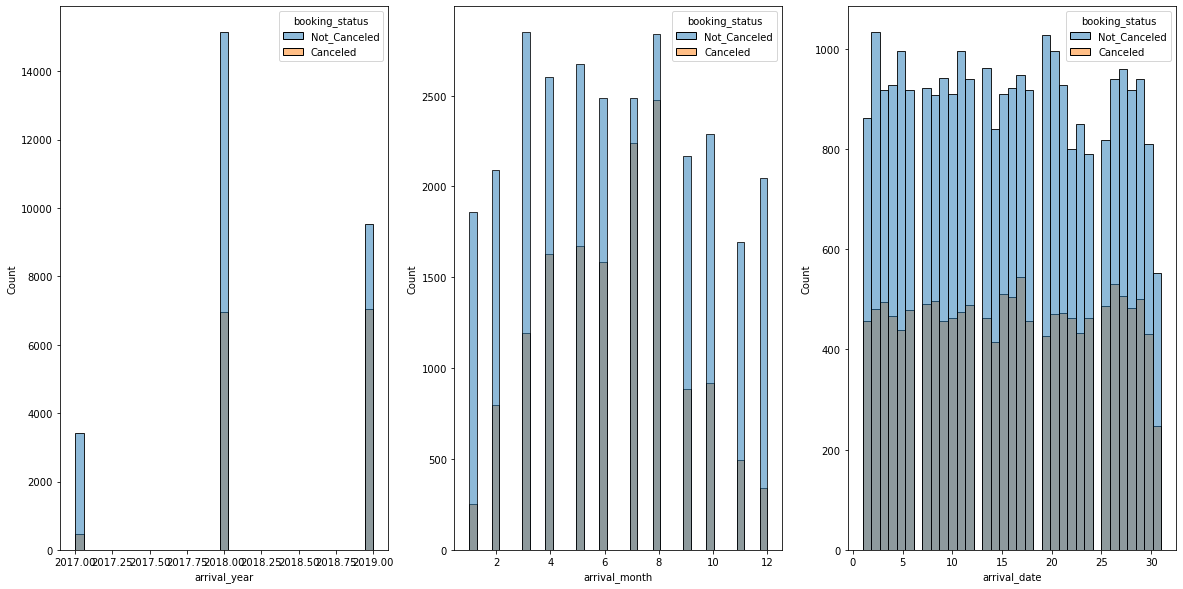

<IPython.core.display.Javascript object>

In [221]:
# g.set_xticklabels
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

sns.histplot(ax=axes[0], data=data, x="arrival_year", hue="booking_status")
sns.histplot(ax=axes[1], data=data, x="arrival_month", hue="booking_status")
sns.histplot(ax=axes[2], data=data, x="arrival_date", hue="booking_status")

* Highest number of cancellations have been made in 2018, 2019.
* Highest number of cancellations have been made in July, August.
* Cancellation proportions are similar on all dates.

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     14487         28089  42576
Online                  13483         20686  34169
Offline                   804          4973   5777
Corporate                 167          1772   1939
Aviation                   33           162    195
Complementary               0           496    496
------------------------------------------------------------------------------------------------------------------------


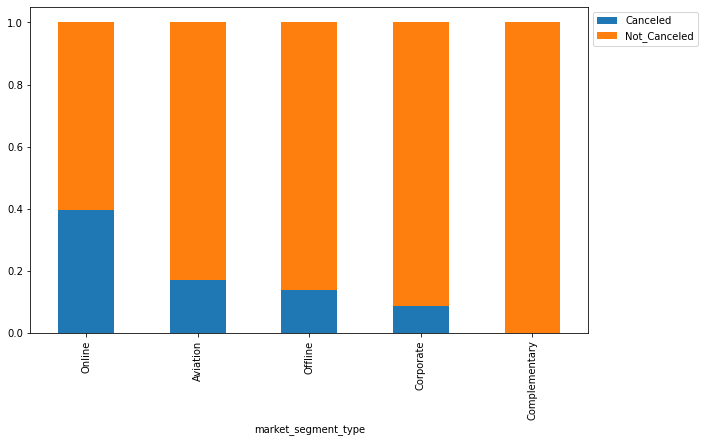

<IPython.core.display.Javascript object>

In [222]:
stacked_barplot(data, "market_segment_type", "booking_status")

* Most cancellations have happened in Online Segment
* No Cancellations in Complementary rooms

<AxesSubplot:xlabel='booking_status', ylabel='avg_price_per_room'>

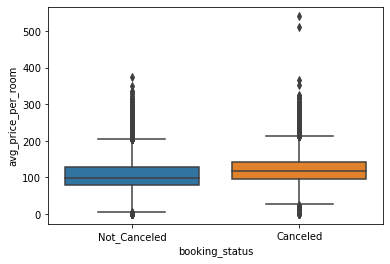

<IPython.core.display.Javascript object>

In [223]:
sns.boxplot(data["booking_status"], data["avg_price_per_room"])

* Distribution of cancelled and not cancelled bookings are similar across the prices.

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        14487         28089  42576
0                           8752         10476  19228
1                           4346         11225  15571
2                           1389          4992   6381
3                              0          1230   1230
4                              0           150    150
5                              0            16     16
------------------------------------------------------------------------------------------------------------------------


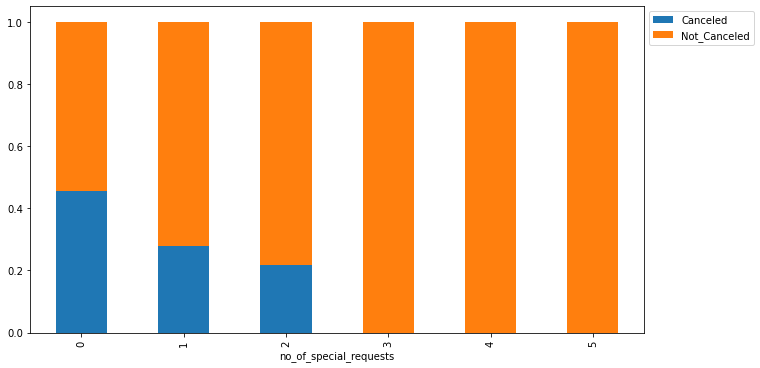

<IPython.core.display.Javascript object>

In [224]:
stacked_barplot(data, "no_of_special_requests", "booking_status")

* Bookings with special requests of 3 or more have not been cancelled. 
* Most cancellations have been made where there were no special requests.

#### What are the differences in room prices in different market segments?

market_segment_type
Aviation         103.234256
Complementary      2.773044
Corporate         82.486086
Offline           87.675326
Online           119.891277
Name: avg_price_per_room, dtype: float64


<AxesSubplot:xlabel='market_segment_type'>

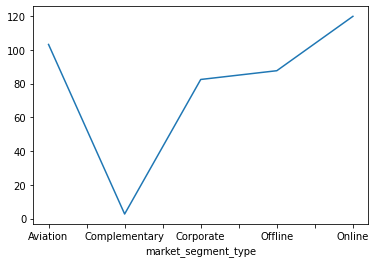

<IPython.core.display.Javascript object>

In [225]:
market = data.groupby("market_segment_type")["avg_price_per_room"].mean()
print(market)
market.plot()

* Avg room price is highest for online segment and least for Complementary segment.

#### Average price for each room type

In [226]:
data.groupby("room_type_reserved")["avg_price_per_room"].mean()

room_type_reserved
Room_Type 1    100.092176
Room_Type 2     90.586657
Room_Type 3     85.958333
Room_Type 4    133.247350
Room_Type 5    158.718366
Room_Type 6    190.853740
Room_Type 7    186.015212
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

* Room_Type 6 is the most expensive room.
* Room_Type 3 is the lease expensive room.

#### Average price for each meal plan

In [227]:
data.groupby("type_of_meal_plan")["avg_price_per_room"].mean()

type_of_meal_plan
Meal Plan 1     113.921702
Meal Plan 2     143.611533
Meal Plan 3      25.750000
Not Selected     99.675941
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

* Meal Plan 2 is the most expensive plan.
* Meal Plan 3 is the least expensive plan.

#### Price with respect to Room type and Meal plan

<AxesSubplot:xlabel='room_type_reserved', ylabel='avg_price_per_room'>

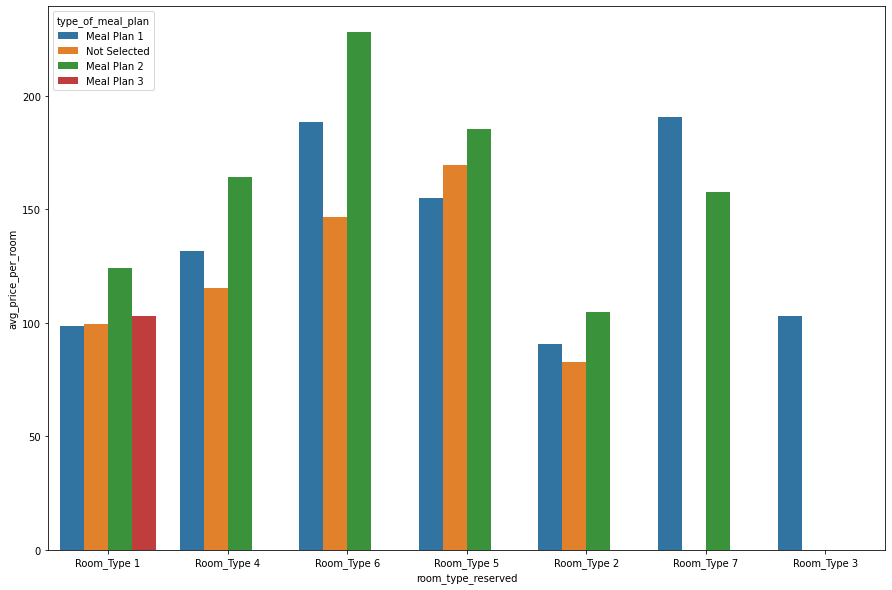

<IPython.core.display.Javascript object>

In [228]:
plt.figure(figsize=(15, 10))
sns.barplot(
    data=data,
    hue="type_of_meal_plan",
    y="avg_price_per_room",
    x="room_type_reserved",
    ci=None,
)

#### Rows with Average price per room = 0

In [229]:
min_price = data[data["avg_price_per_room"] == 0]
min_price.shape

(641, 18)

<IPython.core.display.Javascript object>

* There are 641 bookings with price=0

In [230]:
min_price["market_segment_type"].value_counts()

Complementary    457
Online           184
Name: market_segment_type, dtype: int64

<IPython.core.display.Javascript object>

* 457 of these bookings are complementary. So the price is 0.

<AxesSubplot:xlabel='booking_status', ylabel='count'>

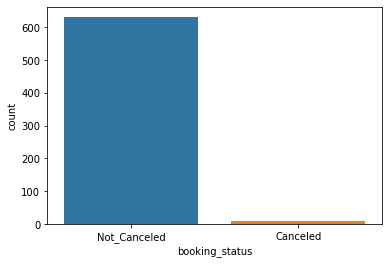

<IPython.core.display.Javascript object>

In [231]:
sns.countplot(data=min_price, x="booking_status")

* Very few bookings are cancelled.

#### Average price per room > 500

In [232]:
max_price = data[data["avg_price_per_room"] > 500]
max_price

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
5656,1,0,0,1,Meal Plan 1,0,Room_Type 1,0,2019,5,9,Online,0,0,0,510.0,0,Canceled
51939,2,0,0,1,Meal Plan 1,0,Room_Type 1,35,2018,3,25,Offline,0,0,0,540.0,0,Canceled


<IPython.core.display.Javascript object>

* There are 2 bookings with price > 500 and both are cancelled.

#### Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [233]:
repeat = data[(data["repeated_guest"] == 1)]

<IPython.core.display.Javascript object>

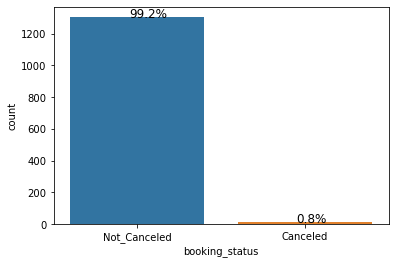

<IPython.core.display.Javascript object>

In [234]:
ax = sns.countplot(repeat["booking_status"])
total = len(repeat["booking_status"])  # length of the column
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
    y = p.get_y() + p.get_height()  # hieght of the plot
    percent = round(p.get_height() / total * 100, 2)
    ax.annotate("{:.1f}%".format(percent), (x, y), size=12)  # annotate the count

#### 0.8% of repeating guests cancel

#### Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

<AxesSubplot:xlabel='no_of_special_requests', ylabel='count'>

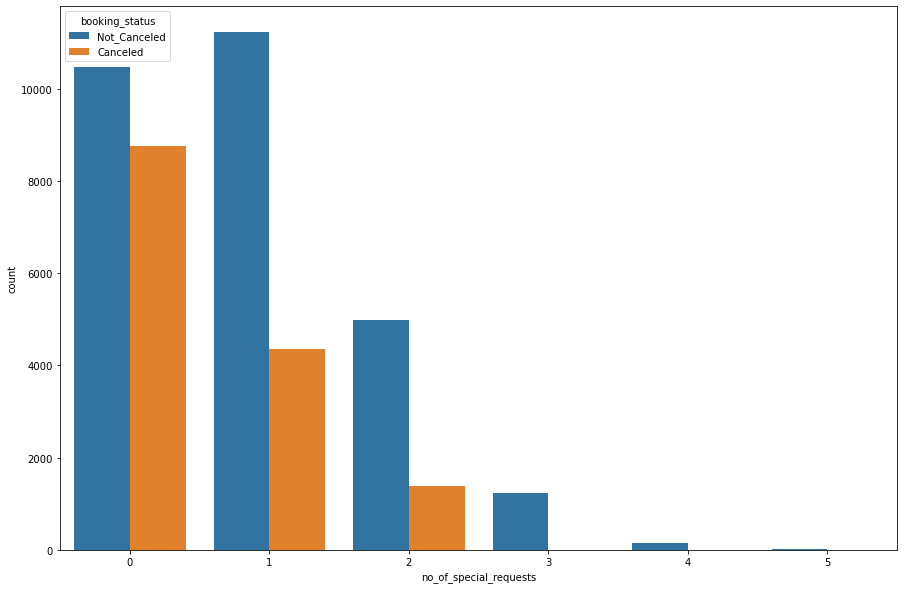

<IPython.core.display.Javascript object>

In [235]:
plt.figure(figsize=(15, 10))
sns.countplot(data=data, x="no_of_special_requests", hue="booking_status")

* Only some people with 1 or 2 special requests have cancelled. 
* Bookings with 3 or more special requests have not cancelled. 
* Hence with increasing number of special requests, bookings will not be cancelled.

#### Bookings with no adults

In [236]:
adults_0 = data[data["no_of_adults"] == 0]
adults_0.shape

(184, 18)

<IPython.core.display.Javascript object>

* There are 184 bookings with no adults.

In [237]:
adults_0["no_of_children"].value_counts()

2    176
3      6
1      2
Name: no_of_children, dtype: int64

<IPython.core.display.Javascript object>

* Bookings without adults (only for children) cannot be made. This error has to be rectified. 

#### Bookings with 0 number of nights

In [238]:
nights = data[(data["no_of_weekend_nights"] == 0) & (data["no_of_week_nights"] == 0)]

<IPython.core.display.Javascript object>

In [239]:
nights.shape

(99, 18)

<IPython.core.display.Javascript object>

In [240]:
nights["avg_price_per_room"].value_counts()

0.0    99
Name: avg_price_per_room, dtype: int64

<IPython.core.display.Javascript object>

In [241]:
nights["booking_status"].value_counts()

Not_Canceled    97
Canceled         2
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

* There are 99 bookings with 0 number of nights booked.
* Average price for all these bookings is 0.
* Only 2 were cancelled.

#### Average price per room based on which days were booked ( Weekdays/Weekends/both)

In [242]:
# Only weekends have been booked:
weekend_only = data[
    (data["no_of_weekend_nights"] > 0) & (data["no_of_week_nights"] == 0)
]

<IPython.core.display.Javascript object>

In [243]:
weekend_price = weekend_only.groupby("room_type_reserved")[
    "avg_price_per_room"
].mean()  # avg price based on room type
weekendprice = weekend_only["avg_price_per_room"].mean()
print("Avg price of room when only weekends were booked: ", round(weekendprice, 2))

Avg price of room when only weekends were booked:  107.49


<IPython.core.display.Javascript object>

In [244]:
# Only weekdays have been booked:
weekday_only = data[
    (data["no_of_weekend_nights"] == 0) & (data["no_of_week_nights"] > 0)
]

<IPython.core.display.Javascript object>

In [245]:
weekday_price = weekday_only.groupby("room_type_reserved")[
    "avg_price_per_room"
].mean()  # avg price based on room type
weekdayprice = weekday_only["avg_price_per_room"].mean()
print("Avg price of room when only weekdays were booked: ", round(weekdayprice, 2))

Avg price of room when only weekdays were booked:  112.79


<IPython.core.display.Javascript object>

In [246]:
# Both weekends and weekdays have been booked
all_days = data[(data["no_of_weekend_nights"] > 0) & (data["no_of_week_nights"] > 0)]

<IPython.core.display.Javascript object>

In [247]:
alldays_price = all_days.groupby("room_type_reserved")[
    "avg_price_per_room"
].mean()  # avg price based on room type
alldaysprice = all_days["avg_price_per_room"].mean()
print(
    "Avg price of room when weekends and weekdays were booked: ", round(alldaysprice, 2)
)

Avg price of room when weekends and weekdays were booked:  113.14


<IPython.core.display.Javascript object>

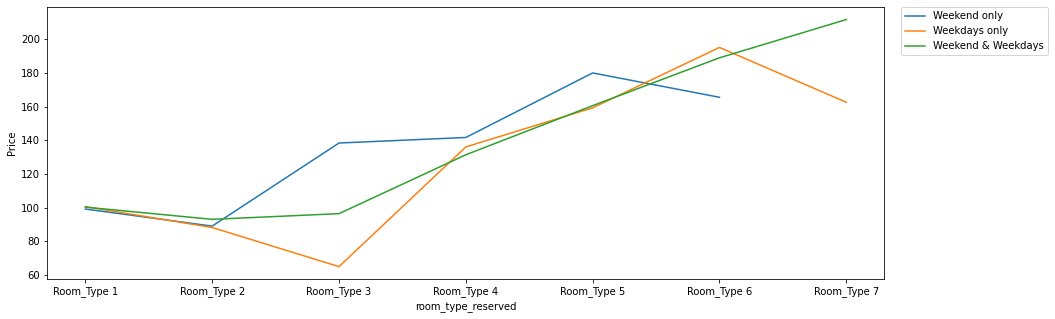

<IPython.core.display.Javascript object>

In [248]:
plt.figure(figsize=(15, 5))
ax = weekend_price.plot(label="Weekend only")
weekday_price.plot(ax=ax, label="Weekdays only").set_ylabel("Price")
alldays_price.plot(ax=ax, label="Weekend & Weekdays")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

* Price for Room type 1 is always same and Room type 2 is almost same.
* Prices for weekend only bookings are higher for room types 3,4,5.
* Prices for weekday only bookings are lower for room types 3,4,5.
* Room type 7 is not chosen on weekends alone. 

#### Comparing price with total number of days for each booking

In [249]:
# Calculating total number of days booked
alldays = pd.DataFrame()
alldays["days"] = data["no_of_weekend_nights"] + data["no_of_week_nights"]

<IPython.core.display.Javascript object>

In [250]:
alldays["price"] = data["avg_price_per_room"]

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='days', ylabel='price'>

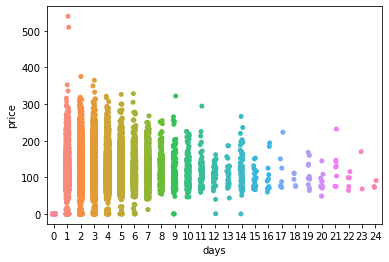

<IPython.core.display.Javascript object>

In [251]:
sns.stripplot(data=alldays, x="days", y="price")

* As total number of days increase, price decreases, range between (50,200).

#### Comparing price with total number of guests in each booking

In [252]:
# Calculating total number of guests
allguests = pd.DataFrame()
allguests["guests"] = data["no_of_adults"] + data["no_of_children"]
allguests["room_type"] = data["room_type_reserved"]
allguests["price"] = data["avg_price_per_room"]
allguests["booking_status"] = data["booking_status"]

<IPython.core.display.Javascript object>

<Figure size 1080x360 with 0 Axes>

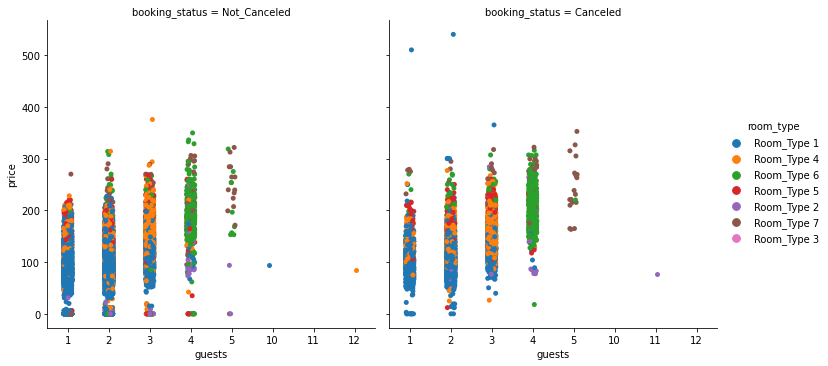

<IPython.core.display.Javascript object>

In [253]:
plt.figure(figsize=(15, 5))
sns.catplot(
    data=allguests, y="price", x="guests", hue="room_type", col="booking_status"
)

* Price increases with more number of guests. 
* Room 6 is most common for 4 number of guests.

#### Exploring different market segments

In [254]:
data["market_segment_type"].value_counts()

Online           34169
Offline           5777
Corporate         1939
Complementary      496
Aviation           195
Name: market_segment_type, dtype: int64

<IPython.core.display.Javascript object>

#### Complementary

In [255]:
complementary = data[data["market_segment_type"] == "Complementary"]

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='arrival_year', ylabel='count'>

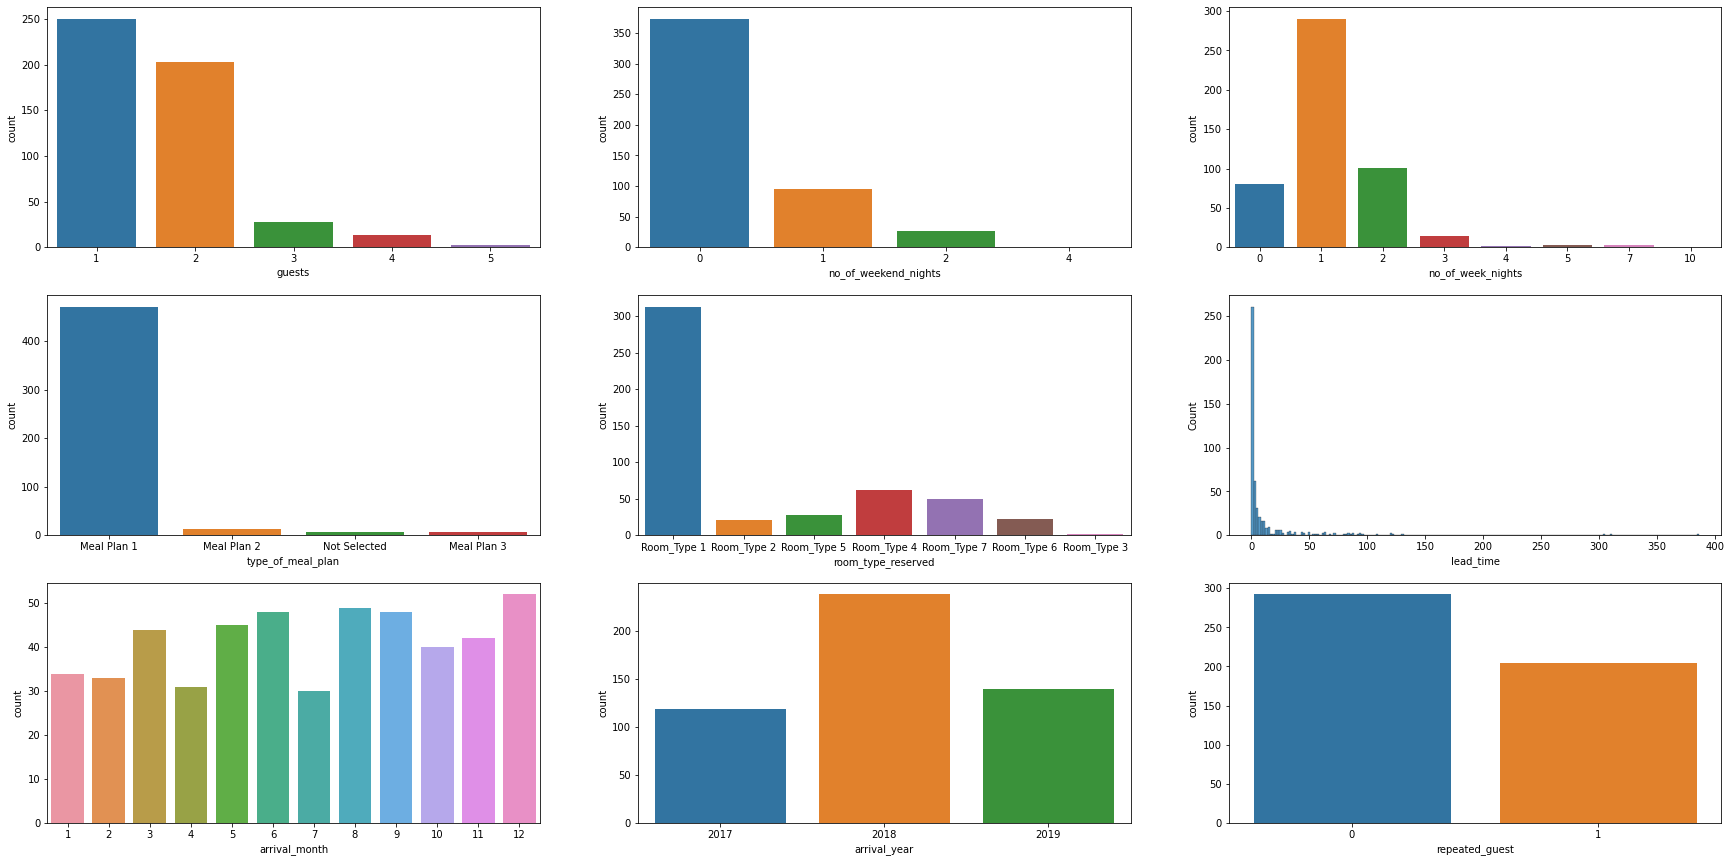

<IPython.core.display.Javascript object>

In [256]:
fig, axes = plt.subplots(3, 3, figsize=(30, 15))

sns.countplot(
    ax=axes[0, 0],
    data=complementary,
    x=complementary["no_of_adults"] + complementary["no_of_children"],
).set_xlabel("guests")
sns.countplot(ax=axes[0, 1], data=complementary, x="no_of_weekend_nights")
sns.countplot(ax=axes[0, 2], data=complementary, x="no_of_week_nights")
sns.countplot(ax=axes[1, 0], data=complementary, x="type_of_meal_plan")
sns.countplot(ax=axes[1, 1], data=complementary, x="room_type_reserved")
sns.histplot(ax=axes[1, 2], data=complementary, x="lead_time")
sns.countplot(ax=axes[2, 0], data=complementary, x="arrival_month")
sns.countplot(ax=axes[2, 2], data=complementary, x="repeated_guest")
sns.countplot(ax=axes[2, 1], data=complementary, x="arrival_year")

**Observations**
* Mostly 1 or 2 guests have stayed.
* No weekend and 1 weekday are the most common days stayed.
* Meal_Plan 1 is the most chosen meal plan.
* Room_Type 1 is the most chosen room.
* Lead_time is mostly less than 25 days.
* Arrival month is kind of uniform with most guests arriving in December while the year 2018 had the most number of guests from complementary sector.
* Complementary rooms were given to more new guests than to old guests. 

#### Aviation

In [257]:
aviation = data[data["market_segment_type"] == "Aviation"]

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='arrival_year', ylabel='count'>

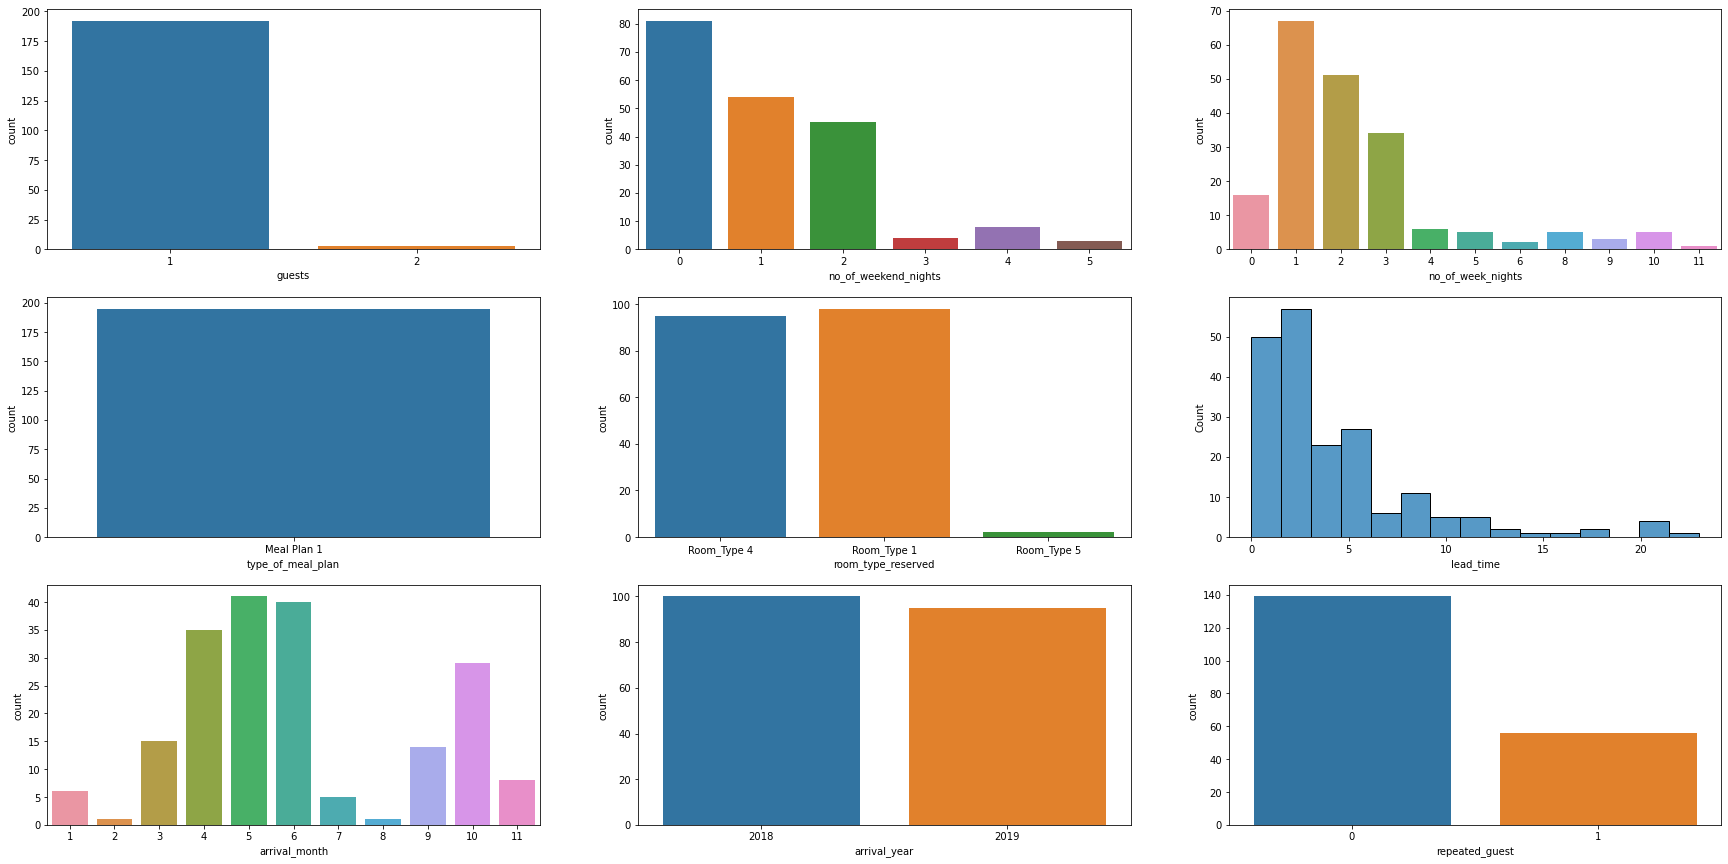

<IPython.core.display.Javascript object>

In [258]:
fig, axes = plt.subplots(3, 3, figsize=(30, 15))

sns.countplot(
    ax=axes[0, 0],
    data=aviation,
    x=aviation["no_of_adults"] + aviation["no_of_children"],
).set_xlabel("guests")
sns.countplot(ax=axes[0, 1], data=aviation, x="no_of_weekend_nights")
sns.countplot(ax=axes[0, 2], data=aviation, x="no_of_week_nights")
sns.countplot(ax=axes[1, 0], data=aviation, x="type_of_meal_plan")
sns.countplot(ax=axes[1, 1], data=aviation, x="room_type_reserved")
sns.histplot(ax=axes[1, 2], data=aviation, x="lead_time")
sns.countplot(ax=axes[2, 0], data=aviation, x="arrival_month")
sns.countplot(ax=axes[2, 2], data=aviation, x="repeated_guest")
sns.countplot(ax=axes[2, 1], data=aviation, x="arrival_year")

**Observations**
* Mostly only 1 adult has stayed ( 1 child with no adults cannot stay).
* 1-2 weekend days and 1-3 weekdays are the most common days stayed.
* Some guests have stayed for about 9 days or more too (with 2 full weekends and a full week in between them). 
* Only Meal_Plan 1 was chosen.
* Room_Type 4 and 1 are the most chosen rooms.
* Lead_time is mostly less than 10 days.
* Most guests have arrived in April, May or June. Guests from the aviation sector have arrived in 2018 and 2019 only.
* There are more new guests than old guests. 

#### Corporate

In [259]:
corporate = data[data["market_segment_type"] == "Corporate"]

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='arrival_year', ylabel='count'>

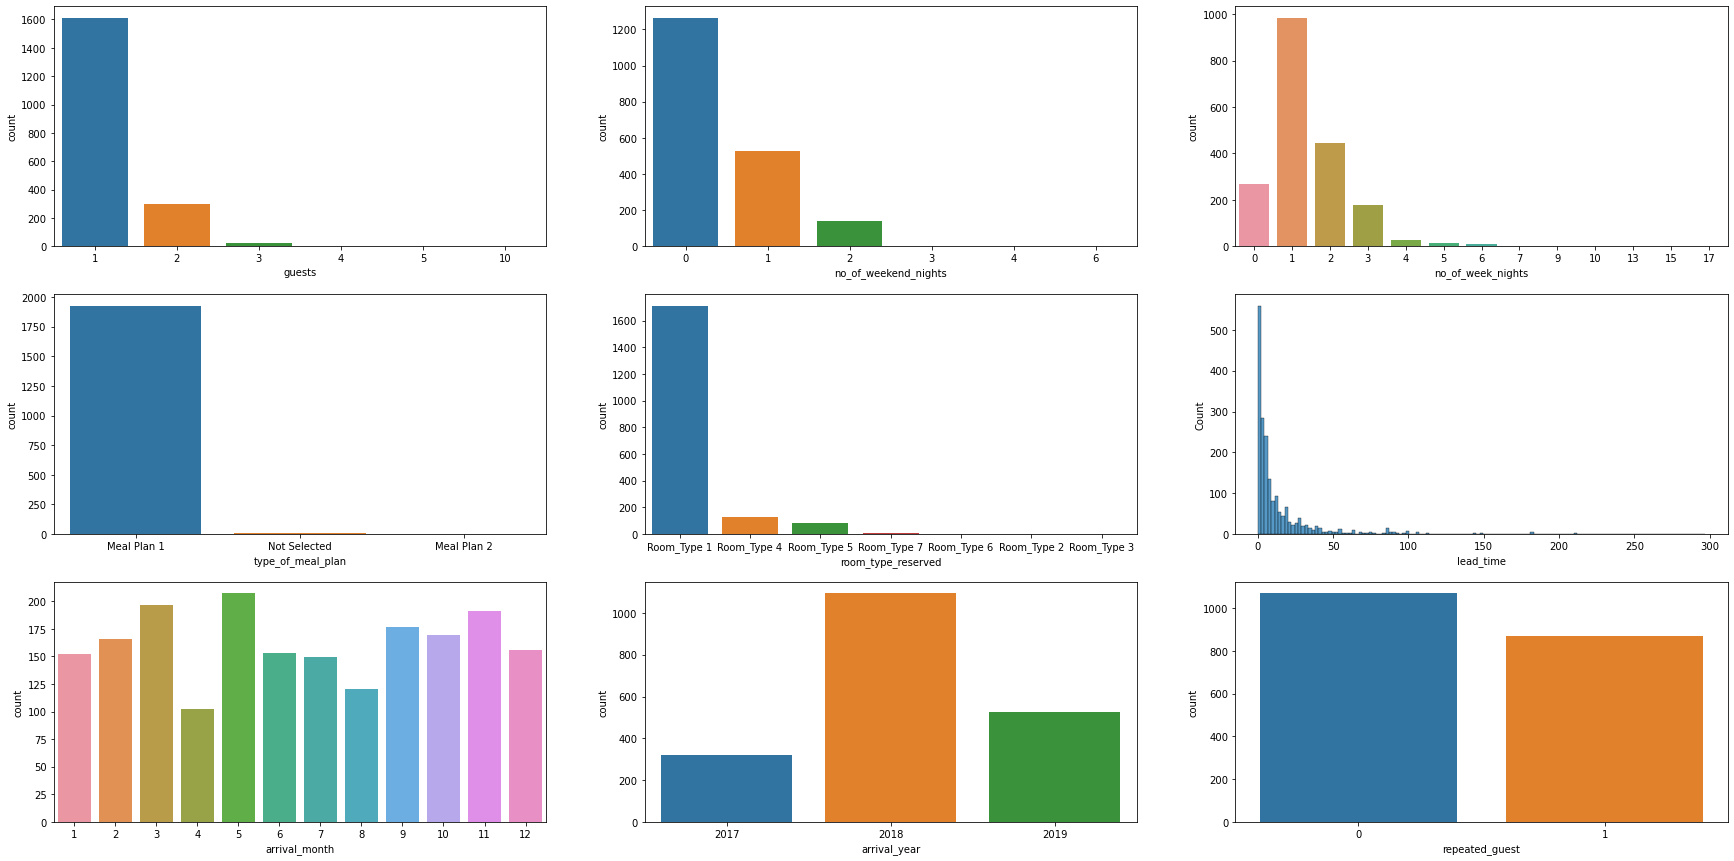

<IPython.core.display.Javascript object>

In [260]:
fig, axes = plt.subplots(3, 3, figsize=(30, 15))

sns.countplot(
    ax=axes[0, 0],
    data=corporate,
    x=corporate["no_of_adults"] + corporate["no_of_children"],
).set_xlabel("guests")
sns.countplot(ax=axes[0, 1], data=corporate, x="no_of_weekend_nights")
sns.countplot(ax=axes[0, 2], data=corporate, x="no_of_week_nights")
sns.countplot(ax=axes[1, 0], data=corporate, x="type_of_meal_plan")
sns.countplot(ax=axes[1, 1], data=corporate, x="room_type_reserved")
sns.histplot(ax=axes[1, 2], data=corporate, x="lead_time")
sns.countplot(ax=axes[2, 0], data=corporate, x="arrival_month")
sns.countplot(ax=axes[2, 2], data=corporate, x="repeated_guest")
sns.countplot(ax=axes[2, 1], data=corporate, x="arrival_year")

**Observations**
* Mostly only 1 adult has stayed.
* 1-2 weekend days and 1-3 weekdays are the most common days stayed.
* Mostly Meal_Plan 1 was chosen.
* Room_Type 1 is the most chosen room.
* Lead_time is mostly less than 50 days.
* Arrival month is kind of uniform with most guests arriving in March, May or November while the year 2018 had the most number of guests from corporate sector.
* There are almost equal number of new and old guests. 

## Insights from EDA

### Data Description
* There were 14,350 duplicates and all were dropped before EDA.
* There are no missing values.
* Most of the data-types are either int64 or float64. Some variables are object type which can be converted to categorical type.
* Booking_status is the dependent variable with values Cancelled and Not Cancelled which can be mapped to 1 and 0 respectively.

### Observations:
* 93% of the guests are adults and remaining 7% are children. There are some rows with 0 adults which is an error as hotel bookings cannot be made without any adults.
* Some guests have stayed only for weekends, some only for weekdays and some both. Some rows have booked neither on weekends nor on weekedays which is an error.
* There are 3 kinds of meal plans, where some guests have not selected any. 74% of them have chosen Meal plan 1.
* Only 3% of the guests require car parking space.
* There There are 7 types of rooms. Room type 1 is the most chosen and room type 3 is the lease chosen. Room type 6 is the most expensive and Room type 3 is the least expensive.
* Lead time is a continuous variable with a range (0,500). Average lead time is less than 100.
* Most number of bookings have been made in 2018. August is the busiest month followed by July. All dates have almost similar number of bookings. 
* 97% of the guests are new customers. Remaining 3% have made previous bookings with this hotel.
* 99% of the guests have not made any cancellations before.
* 97% of guests have 0 previous bookings not cancelled. This means they are all new guests booking for the 1st time.
* Average price per room is about 100 and it ranges from 0-500.
    * As total number of days increase, price decreases, range between (50,200).
    * Price increases with more number of guests.
* 55% of the guests have 1 or more special requests. With inreasing number of special requsts, bookings will not be cancelled. 
* 34% of the bookings have been Cancelled.
* As total number of days increase, price decreases, range between (50,200).
* Price increases with more number of guests.
* Complementary market segment
    * Mostly 1 or 2 guests have stayed.
    * No weekend and 1 weekday are the most common days stayed.
    * Meal_Plan 1 is the most chosen meal plan.
    * Room_Type 1 is the most chosen room.
    * Lead_time is mostly less than 25 days.
    * Arrival month is kind of uniform with most guests arriving in December while the year 2018 had the most number of guests from complementary sector.
    * Complementary rooms were given to more new guests than to old guests.  
* Aviation market segment
    * Mostly only 1 adult has stayed ( 1 child with no adults cannot stay).
    * 1-2 weekend days and 1-3 weekdays are the most common days stayed.
    * Some guests have stayed for about 9 days or more too (with 2 full weekends and a full week in between them). 
    * Only Meal_Plan 1 was chosen.
    * Room_Type 4 and 1 are the most chosen rooms.
    * Lead_time is mostly less than 10 days.
    * Most guests have arrived in April, May or June. Guests from the aviation sector have arrived in 2018 and 2019 only.
    * There are more new guests than old guests. 
* Corporate market segment
    * Mostly only 1 adult has stayed.
    * 1-2 weekend days and 1-3 weekdays are the most common days stayed.
    * Mostly Meal_Plan 1 was chosen.
    * Room_Type 1 is the most chosen room.
    * Lead_time is mostly less than 50 days.
    * Arrival month is kind of uniform with most guests arriving in March, May or November while the year 2018 had the most number of guests from corporate sector.
    * There are almost equal number of new and old guests. 

### Key Questions

1. What are the busiest months in the hotel?
> August followed by july are the busiest months.
2. Which market segment do most of the guests come from?
> Most of the guests come from Online market segment.
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
> Average room price of Online segment is 119.9

    >Average room price of Aviation segment is 103.2

    >Average room price of Offline segment is 87.7

    >Average room price of Corporate segment is 82.5

    >Average room price of Complementary segment 2.7

> Online segment has the highest room price and Complementary has the lowest.

4. What percentage of bookings are canceled?
> 34% of the bookings are cancelled.
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
> 0.8% of repeating guests cancel
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation? 
> Only some people with 1 or 2 special requests have cancelled. Bookings with 3 or more special requests have not cancelled.  Hence with increasing number of special requests, bookings will not be cancelled.

## Data Preprocessing

In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42576 non-null  int64  
 1   no_of_children                        42576 non-null  int64  
 2   no_of_weekend_nights                  42576 non-null  int64  
 3   no_of_week_nights                     42576 non-null  int64  
 4   type_of_meal_plan                     42576 non-null  object 
 5   required_car_parking_space            42576 non-null  int64  
 6   room_type_reserved                    42576 non-null  object 
 7   lead_time                             42576 non-null  int64  
 8   arrival_year                          42576 non-null  int64  
 9   arrival_month                         42576 non-null  int64  
 10  arrival_date                          42576 non-null  int64  
 11  market_segment_

<IPython.core.display.Javascript object>

### Changing Datatypes

In [262]:
for feature in data.columns:  # Loop through all columns in the dataframe
    if data[feature].dtype == "object":  # Only apply for columns with object type
        data[feature] = pd.Categorical(data[feature])  # Change datatype to Categorical

<IPython.core.display.Javascript object>

In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          42576 non-null  int64   
 1   no_of_children                        42576 non-null  int64   
 2   no_of_weekend_nights                  42576 non-null  int64   
 3   no_of_week_nights                     42576 non-null  int64   
 4   type_of_meal_plan                     42576 non-null  category
 5   required_car_parking_space            42576 non-null  int64   
 6   room_type_reserved                    42576 non-null  category
 7   lead_time                             42576 non-null  int64   
 8   arrival_year                          42576 non-null  int64   
 9   arrival_month                         42576 non-null  int64   
 10  arrival_date                          42576 non-null  int64   
 11  ma

<IPython.core.display.Javascript object>

### Bookings with Avg room price=0

In [264]:
min_price = data[data["avg_price_per_room"] == 0]  # rows with avg_price_per_room=0
min_price.shape

(641, 18)

<IPython.core.display.Javascript object>

* There are 641 bookings with price=0

In [265]:
min_price["market_segment_type"].value_counts()

Complementary    457
Online           184
Offline            0
Corporate          0
Aviation           0
Name: market_segment_type, dtype: int64

<IPython.core.display.Javascript object>

* 457 of these bookings are complementary. So the price is 0.
* Remaining 184 bookings are all from the Online segment. Price for these rooms can be calculated based on room type:

In [266]:
online = data[
    data["market_segment_type"] == "Online"
]  # records from Online market segment
print("Average price for each room type in Online segment:")
online.groupby("room_type_reserved")[
    "avg_price_per_room"
].mean()  # avg_price_per_room in online segment for each kind of room

Average price for each room type in Online segment:


room_type_reserved
Room_Type 1    106.138024
Room_Type 2     93.977252
Room_Type 3    105.375000
Room_Type 4    138.443409
Room_Type 5    171.815375
Room_Type 6    194.865825
Room_Type 7    225.492815
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

Changing price for rows where price is 0 and from Online segment based on the room type chosen:

In [267]:
data.loc[  # change avg_price_per_room to 106 where Room type 1 from Online segment has price as 0
    (data["avg_price_per_room"] == 0)
    & (data["market_segment_type"] == "Online")
    & (data["room_type_reserved"] == "Room_Type 1"),
    "avg_price_per_room",
] = 106
data.loc[  # change avg_price_per_room to 194 where Room type 2 from Online segment has price as 0
    (data["avg_price_per_room"] == 0)
    & (data["market_segment_type"] == "Online")
    & (data["room_type_reserved"] == "Room_Type 2"),
    "avg_price_per_room",
] = 94
data.loc[  # change avg_price_per_room to 105 where Room type 3 from Online segment has price as 0
    (data["avg_price_per_room"] == 0)
    & (data["market_segment_type"] == "Online")
    & (data["room_type_reserved"] == "Room_Type 3"),
    "avg_price_per_room",
] = 105
data.loc[  # change avg_price_per_room to 138 where Room type 4 from Online segment has price as 0
    (data["avg_price_per_room"] == 0)
    & (data["market_segment_type"] == "Online")
    & (data["room_type_reserved"] == "Room_Type 4"),
    "avg_price_per_room",
] = 138
data.loc[  # change avg_price_per_room to 172 where Room type 5 from Online segment has price as 0
    (data["avg_price_per_room"] == 0)
    & (data["market_segment_type"] == "Online")
    & (data["room_type_reserved"] == "Room_Type 5"),
    "avg_price_per_room",
] = 172
data.loc[  # change avg_price_per_room to 195 where Room type 6 from Online segment has price as 0
    (data["avg_price_per_room"] == 0)
    & (data["market_segment_type"] == "Online")
    & (data["room_type_reserved"] == "Room_Type 6"),
    "avg_price_per_room",
] = 195
data.loc[  # change avg_price_per_room to 225 where Room type 7 from Online segment has price as 0
    (data["avg_price_per_room"] == 0)
    & (data["market_segment_type"] == "Online")
    & (data["room_type_reserved"] == "Room_Type 7"),
    "avg_price_per_room",
] = 225

<IPython.core.display.Javascript object>

### Bookings with no adults

Hotel rooms  cannot be booked without any adults. 

In [268]:
adults_0 = data[data["no_of_adults"] == 0]  # rows with no_of_adults=0
adults_0.shape

(184, 18)

<IPython.core.display.Javascript object>

In [269]:
adults_0["no_of_children"].value_counts()

2    176
3      6
1      2
Name: no_of_children, dtype: int64

<IPython.core.display.Javascript object>

We will assign 
* no_of_adults=no_of_children  
* no_of_children=0 

to these rows.

In [270]:
# no_of_adults=no_of chlidren
# on_of_children=0
data.loc[data["no_of_adults"] == 0, ["no_of_adults", "no_of_children"]] = [
    adults_0["no_of_children"],
    0,
]

<IPython.core.display.Javascript object>

In [271]:
data.loc[data["no_of_adults"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


<IPython.core.display.Javascript object>

Now there are no rows with 0 adults.

### Bookings with 0 nights

In [272]:
nights = data[
    (data["no_of_weekend_nights"] == 0) & (data["no_of_week_nights"] == 0)
]  # rows with weekends and weekdays=0
nights.shape

(99, 18)

<IPython.core.display.Javascript object>

In [273]:
nights["avg_price_per_room"].value_counts()

106.0    68
0.0      16
138.0     9
195.0     3
94.0      1
172.0     1
225.0     1
Name: avg_price_per_room, dtype: int64

<IPython.core.display.Javascript object>

In [274]:
nights["booking_status"].value_counts()

Not_Canceled    97
Canceled         2
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

* There are 99 columns with 0 number of nights booked.
* Average price for 16 bookings is 0.
* Only 2 were cancelled.

In [275]:
nights["market_segment_type"].value_counts()

Online           83
Complementary    16
Offline           0
Corporate         0
Aviation          0
Name: market_segment_type, dtype: int64

<IPython.core.display.Javascript object>

* 16 bookings are Complementary that is why their price is 0.

**Treating number of booked nights of Online segment where both weekend and week nights are 0** 

For each room type, most common number of weekend nights:

<AxesSubplot:xlabel='room_type_reserved', ylabel='count'>

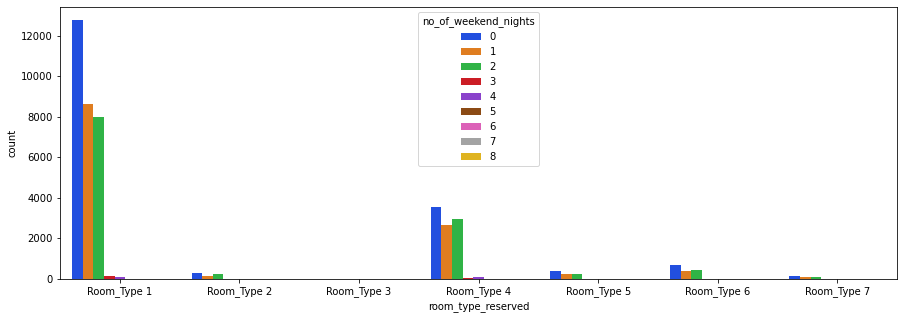

<IPython.core.display.Javascript object>

In [276]:
plt.figure(figsize=(15, 5))
sns.countplot(
    data=data, hue="no_of_weekend_nights", x="room_type_reserved", palette="bright"
)

In [277]:
data.groupby("room_type_reserved")["no_of_weekend_nights"].agg(pd.Series.mode)

room_type_reserved
Room_Type 1    0
Room_Type 2    0
Room_Type 3    1
Room_Type 4    0
Room_Type 5    0
Room_Type 6    0
Room_Type 7    0
Name: no_of_weekend_nights, dtype: int64

<IPython.core.display.Javascript object>

For each room type, most common number of week nights:

<AxesSubplot:xlabel='room_type_reserved', ylabel='count'>

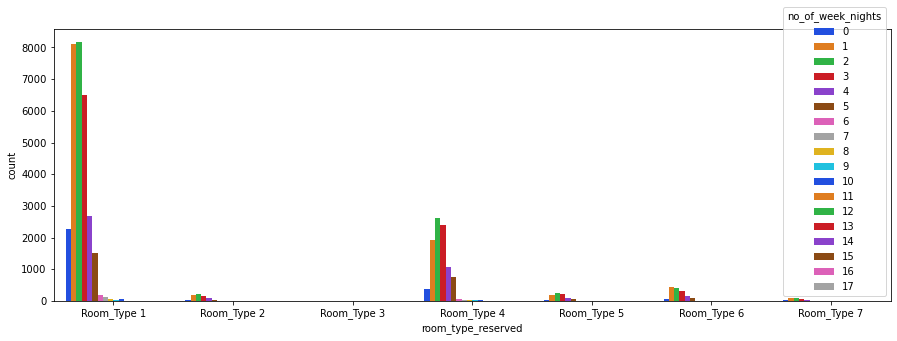

<IPython.core.display.Javascript object>

In [278]:
plt.figure(figsize=(15, 5))
sns.countplot(
    data=data, hue="no_of_week_nights", x="room_type_reserved", palette="bright"
)

In [279]:
data.groupby("room_type_reserved")["no_of_week_nights"].agg(pd.Series.mode)

room_type_reserved
Room_Type 1    2
Room_Type 2    2
Room_Type 3    2
Room_Type 4    2
Room_Type 5    2
Room_Type 6    1
Room_Type 7    2
Name: no_of_week_nights, dtype: int64

<IPython.core.display.Javascript object>

* Most common no_of_weekend_nights is 0 for all kinds of rooms.
* Based on the type of room selected, we will assign **no_of_week_nights** as the most common number of week nights in the dataset.

In [280]:
data.loc[ # assign no_of_week_nights = 2 where no nights were booked and Room Type 1
    (data["no_of_weekend_nights"] == 0) & (data["no_of_week_nights"] == 0) & (data["room_type_reserved"] == "Room_Type 1"),
    "no_of_week_nights"] = 2
data.loc[ # assign no_of_week_nights = 2 where no nights were booked and Room Type 2
    (data["no_of_weekend_nights"] == 0) & (data["no_of_week_nights"] == 0) & (data["room_type_reserved"] == "Room_Type 2"),
    "no_of_week_nights"] = 2
data.loc[ # assign no_of_week_nights = 2 where no nights were booked and Room Type 3
    (data["no_of_weekend_nights"] == 0) & (data["no_of_week_nights"] == 0) & (data["room_type_reserved"] == "Room_Type 3"),
    "no_of_week_nights"] = 2
data.loc[ # assign no_of_week_nights = 2 where no nights were booked and Room Type 4
    (data["no_of_weekend_nights"] == 0) & (data["no_of_week_nights"] == 0) & (data["room_type_reserved"] == "Room_Type 4"),
    "no_of_week_nights"] = 2
data.loc[ # assign no_of_week_nights = 2 where no nights were booked and Room Type 5
    (data["no_of_weekend_nights"] == 0) & (data["no_of_week_nights"] == 0) & (data["room_type_reserved"] == "Room_Type 5"),
    "no_of_week_nights"] = 2
data.loc[ # assign no_of_week_nights = 1 where no nights were booked and Room Type 6
    (data["no_of_weekend_nights"] == 0) & (data["no_of_week_nights"] == 0) & (data["room_type_reserved"] == "Room_Type 6"),
    "no_of_week_nights"] = 1
data.loc[ # assign no_of_week_nights = 2 where no nights were booked and Room Type 7
    (data["no_of_weekend_nights"] == 0) & (data["no_of_week_nights"] == 0) & (data["room_type_reserved"] == "Room_Type 7"),
    "no_of_week_nights"] = 2


<IPython.core.display.Javascript object>

In [281]:
data.loc[(data["no_of_weekend_nights"] == 0) & (data["no_of_week_nights"] == 0)]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


<IPython.core.display.Javascript object>

Now there are no rows with 0 nights.

### Outlier Detection

Outliers need to be treated for continuous data. There are 2 continuous data variables:
* lead_time
* avg_price_per_room

In [282]:
data["avg_price_per_room"].min()

0.0

<IPython.core.display.Javascript object>

* Since there is a segment of complementary rooms, their price has to remain 0.

<AxesSubplot:xlabel='avg_price_per_room'>

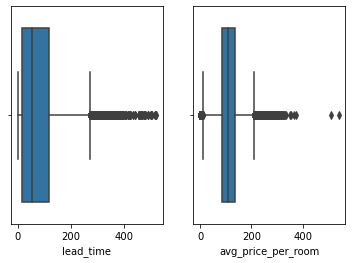

<IPython.core.display.Javascript object>

In [283]:
fig, axes = plt.subplots(1, 2)

sns.boxplot(ax=axes[0], data=data, x="lead_time")
sns.boxplot(ax=axes[1], data=data, x="avg_price_per_room")

* Most of the outliers are on the higher end. Only that can be treated.

In [284]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(a=df[col], a_min=None, a_max=Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in selected columns
    col_list: list of selected columns
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [285]:
# treating outliers
col = ["lead_time", "avg_price_per_room"]
df = treat_outliers_all(data, col)  # treat them

<IPython.core.display.Javascript object>

After treating outliers:

<AxesSubplot:xlabel='avg_price_per_room'>

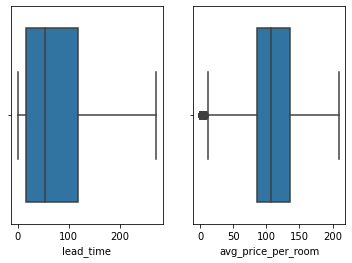

<IPython.core.display.Javascript object>

In [286]:
fig, axes = plt.subplots(1, 2)

sns.boxplot(ax=axes[0], data=data, x="lead_time")
sns.boxplot(ax=axes[1], data=data, x="avg_price_per_room")

**Converting values of booking_status to 1s and 0s:**

In [287]:
# Create a struct with corresponding conversion values
replaceStruct = {"booking_status": {"Canceled": 1, "Not_Canceled": 0}}

<IPython.core.display.Javascript object>

In [288]:
data = data.replace(replaceStruct)  # update data

<IPython.core.display.Javascript object>

## EDA after Data processing

<AxesSubplot:>

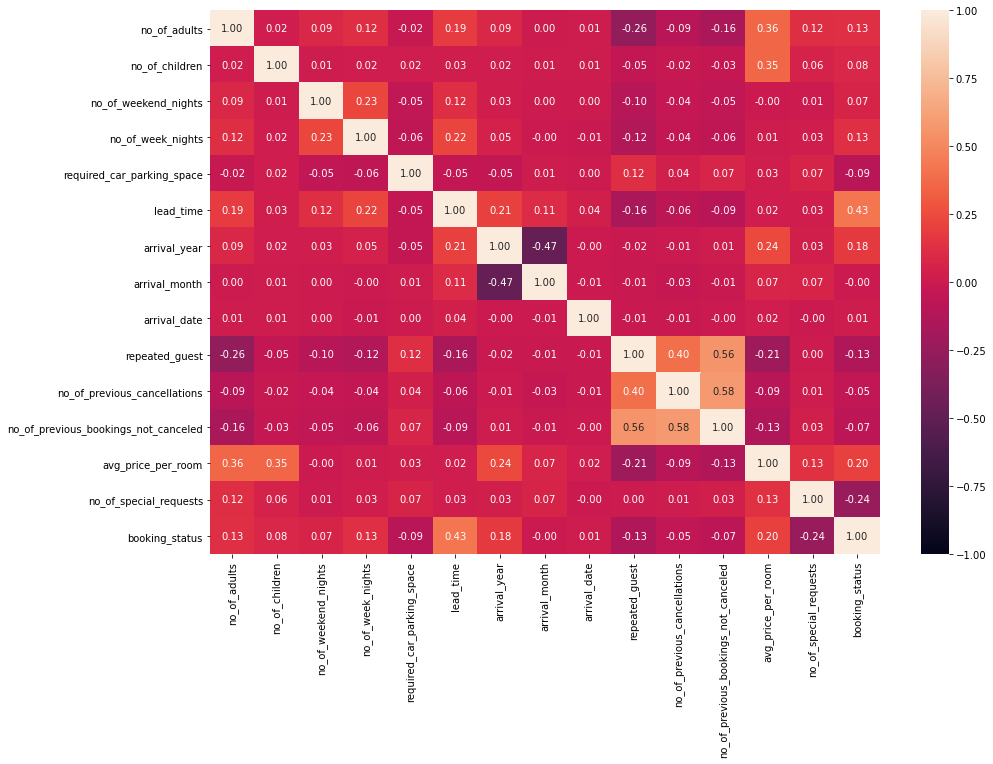

<IPython.core.display.Javascript object>

In [289]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")

* booking_status has a slightly high positive correlation with lead time and a negative correlation with no_of_special requests.
* avg_price_per_room has some positive correlation with no_of_adults and no_of_children.
* repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_cancelled have some positive correlation with each other. 

<AxesSubplot:xlabel='booking_status', ylabel='lead_time'>

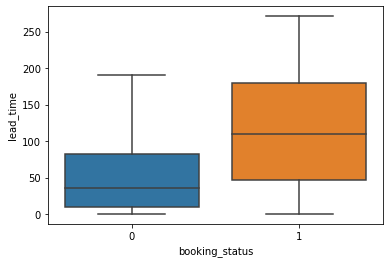

<IPython.core.display.Javascript object>

In [290]:
sns.boxplot(data=data, y="lead_time", x="booking_status", showfliers=False)

* More number of bookings have been cancelled based on lead_time

<AxesSubplot:xlabel='booking_status', ylabel='avg_price_per_room'>

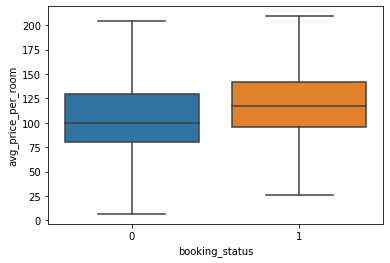

<IPython.core.display.Javascript object>

In [291]:
sns.boxplot(data=data, y="avg_price_per_room", x="booking_status", showfliers=False)

* Almost equal number of bookings have been cancelled and not cancelled based on avg price per room.

#### Average price per room based on which days were booked ( Weekdays/Weekends/both)

In [292]:
# Only weekends have been booked:
weekend_only = data[
    (data["no_of_weekend_nights"] > 0) & (data["no_of_week_nights"] == 0)
]

<IPython.core.display.Javascript object>

In [293]:
weekend_price = weekend_only.groupby("room_type_reserved")[
    "avg_price_per_room"
].mean()  # avg price based on room type
weekendprice = weekend_only["avg_price_per_room"].mean()
weekendprice

107.44146775389176

<IPython.core.display.Javascript object>

In [294]:
# Only weekdays have been booked:
weekday_only = data[
    (data["no_of_weekend_nights"] == 0) & (data["no_of_week_nights"] > 0)
]

<IPython.core.display.Javascript object>

In [295]:
weekday_price = weekday_only.groupby("room_type_reserved")[
    "avg_price_per_room"
].mean()  # avg price based on room type
weekdayprice = weekday_only["avg_price_per_room"].mean()
weekdayprice

112.25109204105931

<IPython.core.display.Javascript object>

In [296]:
# both weekends and weekdays together:
all_days = data[(data["no_of_weekend_nights"] > 0) & (data["no_of_week_nights"] > 0)]

<IPython.core.display.Javascript object>

In [297]:
alldays_price = all_days.groupby("room_type_reserved")[
    "avg_price_per_room"
].mean()  # avg price based on room type
alldaysprice = all_days["avg_price_per_room"].mean()
alldaysprice

112.76194929475392

<IPython.core.display.Javascript object>

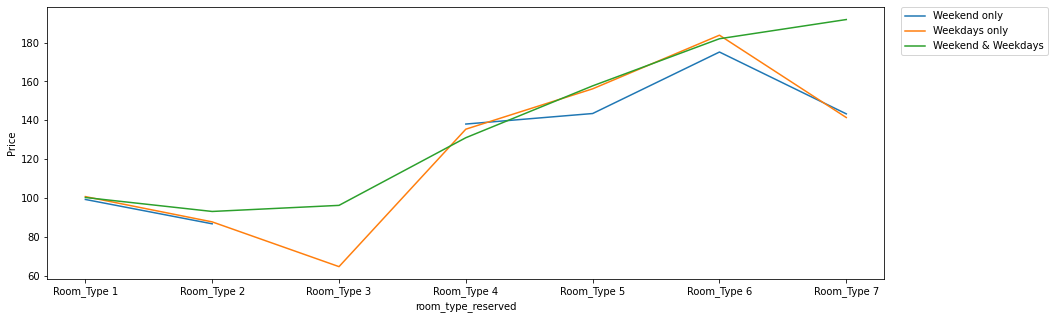

<IPython.core.display.Javascript object>

In [298]:
plt.figure(figsize=(15, 5))
ax = weekend_price.plot(label="Weekend only")
weekday_price.plot(ax=ax, label="Weekdays only").set_ylabel("Price")
alldays_price.plot(ax=ax, label="Weekend & Weekdays")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

* Price for Room type 1 is always same and Room type 2 is almost same.
* Prices for Weekends+Weekdays is highest for almost all rooms.
* Prices for Weekends only is lowest(or same as Weekdays only) for all rooms. Room Type 3 is not booked during Weekends alone.

#### Comparing price with total number of days for each booking

In [299]:
# Calculating total number of days booked
alldays = pd.DataFrame()
alldays["days"] = data["no_of_weekend_nights"] + data["no_of_week_nights"]

<IPython.core.display.Javascript object>

In [300]:
alldays["price"] = data["avg_price_per_room"]

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='days', ylabel='price'>

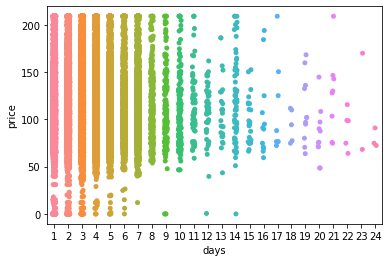

<IPython.core.display.Javascript object>

In [301]:
sns.stripplot(data=alldays, x="days", y="price")

* As total number of days increase, avg price range is still between (50,200).
* Max price is also about 200.

#### Comparing price with total number of guests in each booking

In [302]:
# Calculating total number of guests
allguests = pd.DataFrame()
allguests["guests"] = data["no_of_adults"] + data["no_of_children"]
allguests["room_type"] = data["room_type_reserved"]
allguests["price"] = data["avg_price_per_room"]
allguests["booking_status"] = data["booking_status"]

<IPython.core.display.Javascript object>

<Figure size 1080x360 with 0 Axes>

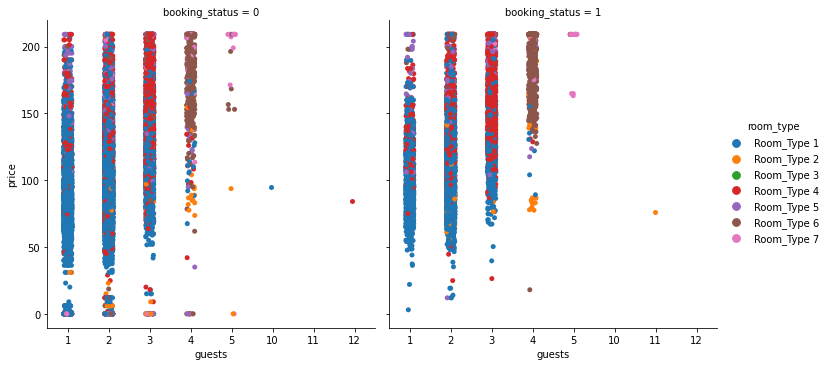

<IPython.core.display.Javascript object>

In [303]:
plt.figure(figsize=(15, 5))
sns.catplot(
    data=allguests, y="price", x="guests", hue="room_type", col="booking_status"
)

* Minimum Price increases with more number of guests. 
* Most common room is Room Type 1.
* None of the Complementary bookings ( price=0 ) is cancelled.

## Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer is not going to cancel but in reality the customer will cancel - Loss of resources
2. Predicting a customer is going to cancel but in reality the customer will not cancel - Loss of opportunity


### Which Loss is greater ? 

* Loss of opportunity will be the greater loss as the hotel will be losing a potential guest.

### How to reduce this loss i.e need to reduce False Negatives ?

* Company would want to reduce false negatives, this can be done by maximizing the Recall. Greater the recall lesser the chances of false negatives.

## Logistic Regression

In [304]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [305]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [306]:
X = data.drop("booking_status", axis=1)
Y = data["booking_status"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [307]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(
    disp=False, warn_convergence=False
)  # setting disp=False will remove the information on number of iterations

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29775
Method:                           MLE   Df Model:                           27
Date:                Fri, 17 Sep 2021   Pseudo R-squ.:                  0.3265
Time:                        23:27:50   Log-Likelihood:                -12852.
converged:                      False   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   17.8880     68.475      0.261      0.794    -116.321     152.097
no_of_adults                            -0.0259      

<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient shows that probability of booking getting canceled decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that that probability of booking getting canceled increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

### Additional Information on VIF

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearity that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use. 

In [308]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   1.861933e+07
no_of_adults                            1.439128e+00
no_of_children                          2.090482e+00
no_of_weekend_nights                    1.084301e+00
no_of_week_nights                       1.135520e+00
required_car_parking_space              1.035838e+00
lead_time                               1.347594e+00
arrival_year                            1.800044e+00
arrival_month                           1.563523e+00
arrival_date                            1.004679e+00
repeated_guest                          2.016500e+00
no_of_previous_cancellations            1.509326e+00
no_of_previous_bookings_not_canceled    1.846160e+00
avg_price_per_room                      2.736897e+00
no_of_special_requests                  1.111233e+00
type_of_meal_plan_Meal Plan 2           1.103776e+00
type_of_meal_plan_Meal Plan 3           1.027537e+00
type_of_meal_plan_Not Selected          1.340095e+00
room_type_r

<IPython.core.display.Javascript object>

market_segment_type_offline and market_segment_type_online show high colinearty. 

Removing market_segment_type_Offline:

In [309]:
X_train = X_train.drop("market_segment_type_Offline", axis=1)

<IPython.core.display.Javascript object>

In [310]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   1.859216e+07
no_of_adults                            1.412170e+00
no_of_children                          2.090236e+00
no_of_weekend_nights                    1.083879e+00
no_of_week_nights                       1.134943e+00
required_car_parking_space              1.035837e+00
lead_time                               1.343638e+00
arrival_year                            1.797858e+00
arrival_month                           1.563261e+00
arrival_date                            1.004670e+00
repeated_guest                          1.983171e+00
no_of_previous_cancellations            1.508871e+00
no_of_previous_bookings_not_canceled    1.843989e+00
avg_price_per_room                      2.732604e+00
no_of_special_requests                  1.111018e+00
type_of_meal_plan_Meal Plan 2           1.102445e+00
type_of_meal_plan_Meal Plan 3           1.027535e+00
type_of_meal_plan_Not Selected          1.340063e+00
room_type_r

<IPython.core.display.Javascript object>

Now none of the variables exhibit high multicollinearity, so the values in the summary are reliable.

Removing columns with p value greater than 0.05 iteratively by removing the column with highest p value first

In [311]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False, warn_convergence=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['no_of_children', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 6', 'market_segment_type_Corporate', 'market_segment_type_Online']


<IPython.core.display.Javascript object>

* The above columns are the significant column.
* We see that the loop has removed the constant also but we will need it to build the logistic regression model. So along with the significant variables we will keep the 'const' column as well.

In [312]:
# creating a new training set
X_train1 = X_train[
    [
        "const",
        "no_of_children",
        "no_of_week_nights",
        "required_car_parking_space",
        "lead_time",
        "arrival_year",
        "arrival_month",
        "repeated_guest",
        "no_of_previous_cancellations",
        "avg_price_per_room",
        "no_of_special_requests",
        "type_of_meal_plan_Not Selected",
        "room_type_reserved_Room_Type 6",
        "market_segment_type_Corporate",
        "market_segment_type_Online",
    ]
].astype(float)

<IPython.core.display.Javascript object>

In [313]:
logit1 = sm.Logit(y_train, X_train1)
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29788
Method:                           MLE   Df Model:                           14
Date:                Fri, 17 Sep 2021   Pseudo R-squ.:                  0.3248
Time:                        23:27:56   Log-Likelihood:                -12884.
converged:                       True   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -17.5068     67.517     -0.259      0.795    -149.837     114.824
no_of_children                     0.1257      0.047      2.683      0.

<IPython.core.display.Javascript object>

In [314]:
X_train2 = X_train1.drop("arrival_year", axis=1)

<IPython.core.display.Javascript object>

In [315]:
logit2 = sm.Logit(y_train, X_train2)
lg2 = logit2.fit(disp=False)
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29789
Method:                           MLE   Df Model:                           13
Date:                Fri, 17 Sep 2021   Pseudo R-squ.:                  0.3248
Time:                        23:27:56   Log-Likelihood:                -12884.
converged:                       True   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.7968      0.089    -53.645      0.000      -4.972      -4.622
no_of_children                     0.1254      0.047      2.678      0.

<IPython.core.display.Javascript object>

**Now no feature has p-value greater than 0.05, so we'll consider the features in *X_train2* as the final ones and *lg2* as final model.**

### Coefficient interpretations

* Coefficients of required_car_parking_space,arrival_month, repeated_guest, no_of_special_requests, room_type_reserved_Room_Type 6 are negative; an increase in these will lead to a decrease in chances of a booking getting canceled.


* Coefficients of no_of_children, no_of_week_nights, lead_time, no_of_previous_cancellations, avg_price_per_room, type_of_meal_plan_Not Selected, market_segment_type_Corporate, market_segment_type_Online are positive; an increase in these will lead to an increase in chances of a booking getting canceled.


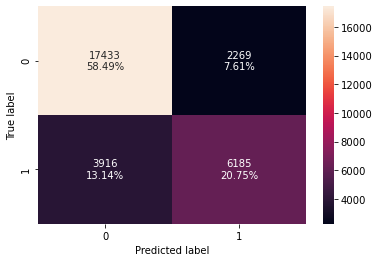

<IPython.core.display.Javascript object>

In [316]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [317]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns)

,Odds,Change_odd%
const,0.008256,-99.174362
no_of_children,1.133598,13.359807
no_of_week_nights,1.071306,7.130604
required_car_parking_space,0.221892,-77.810813
lead_time,1.017328,1.732828
arrival_month,0.965144,-3.485561
repeated_guest,0.054772,-94.522825
no_of_previous_cancellations,1.226117,22.611705
avg_price_per_room,1.015395,1.539522
no_of_special_requests,0.277847,-72.215300


<IPython.core.display.Javascript object>

### Coefficient interpretations

* `no_of_adults`: Holding all other features constant a unit change in no_of_adults will decrease the odds of a booking getting cancelled by 0.95 times or a 4.29% decrease in odds.
* `lead_time`: Holding all other features constant a unit change in lead_time will increase the odds of a booking getting cancelled by 1.01 times or a 1.7% increase in the odds.
* `room_type_reserved`: The odds of a booking who has a room_type_reserved_Room_Type 6 getting cancelled is 0.71 times less than a booking with any other type of room_type_reserved or 28.43% fewer odds than a booking with any other type of room_type_reserved. [keeping all the other categorical levels of room_type_reserved category as a reference]

`Interpretation for other attributes can be done similarly.`

### Assumptions of Logistic Regression

* The Dependent variable is categorical (binary) - yes booking_status has 2 values (Canceled-1, Not_Canceled-0)
* Independence of observations - duplicates were removed.
* Absence of multicollinearity - VIF values were checked for multicollinearity and treated.
* Lack of outliers - outliers were treated.

#### Checking model performance on the training set

In [318]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.792471,0.612316,0.731606,0.666667


<IPython.core.display.Javascript object>

* Default Threshold is 0.5
* Acuuracy is not very high
* Recall is 0.61 which is low

### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### ROC-AUC

* ROC-AUC on training set

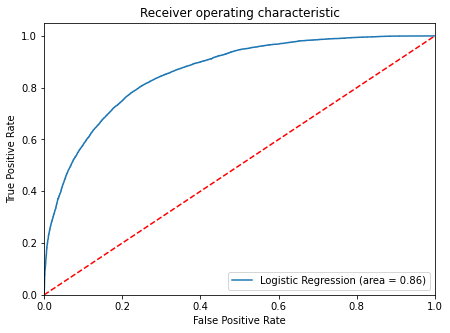

<IPython.core.display.Javascript object>

In [319]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Optimal threshold using AUC-ROC curve

In [320]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.309546842026142


<IPython.core.display.Javascript object>

#### Checking model performance on training set

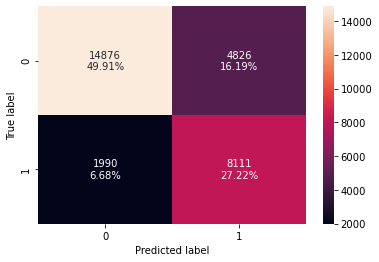

<IPython.core.display.Javascript object>

In [321]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [322]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = (
    model_performance_classification_statsmodels(
        lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.771298,0.80299,0.626961,0.704141


<IPython.core.display.Javascript object>

* Model performance has improved significantly.
* Model has a recall of 0.80 as compared to initial model which was giving a recall of 0.61. 
* Precision has decreased from 0.73 to 0.62.
* Acuuracy is decreased from 0.79 to 0.77

#### Let's use Precision-Recall curve and see if we can find a better threshold

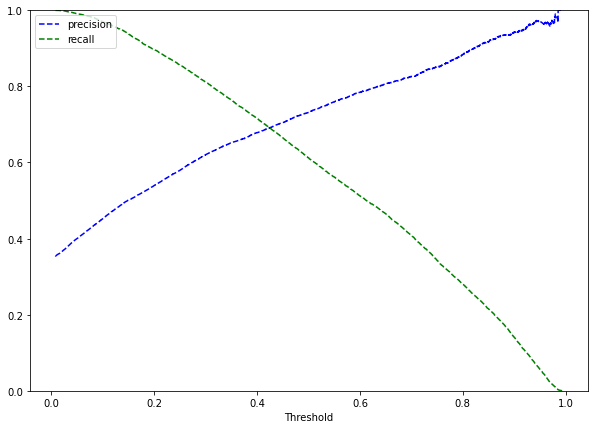

<IPython.core.display.Javascript object>

In [323]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [324]:
# setting the threshold
optimal_threshold_curve = 0.40

<IPython.core.display.Javascript object>

#### Checking model performance on training set

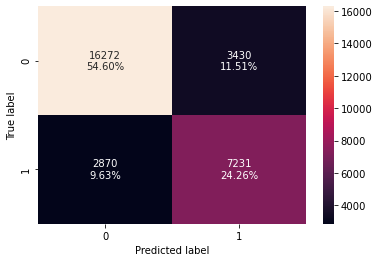

<IPython.core.display.Javascript object>

In [325]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_curve)

In [326]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.788612,0.71587,0.678267,0.696561


<IPython.core.display.Javascript object>

* Recall has decreased to 0.71 from 0.80 from the previous AUC-ROC model
* Accuracy and Precission have increased from previous model.
* F1 score has also decreased

In [327]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-0.5 Threshold",
    "Logistic Regression-0.31 Threshold",
    "Logistic Regression-0.4 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-0.5 Threshold,Logistic Regression-0.31 Threshold,Logistic Regression-0.4 Threshold
Accuracy,0.792471,0.771298,0.788612
Recall,0.612316,0.802990,0.715870
Precision,0.731606,0.626961,0.678267
F1,0.666667,0.704141,0.696561


<IPython.core.display.Javascript object>

### Let's check the performance on the test set

**Dropping the columns from the test set that were dropped from the training set**

In [328]:
X_test2 = X_test[X_train2.columns]

<IPython.core.display.Javascript object>

**Using model with default threshold**

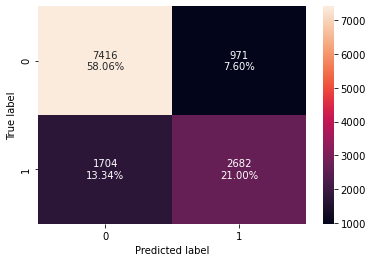

<IPython.core.display.Javascript object>

In [329]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test)

In [330]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.790574,0.611491,0.734191,0.667247


<IPython.core.display.Javascript object>

* ROC curve on test set

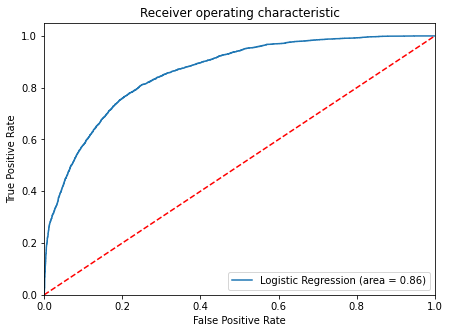

<IPython.core.display.Javascript object>

In [331]:
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.31** 

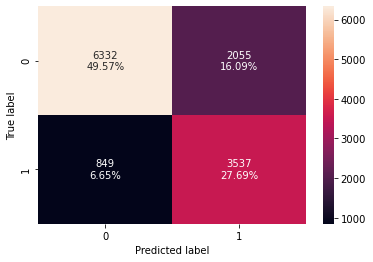

<IPython.core.display.Javascript object>

In [332]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [333]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = (
    model_performance_classification_statsmodels(
        lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
    )
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.772645,0.80643,0.632511,0.70896


<IPython.core.display.Javascript object>

**Using model with threshold = 0.40**

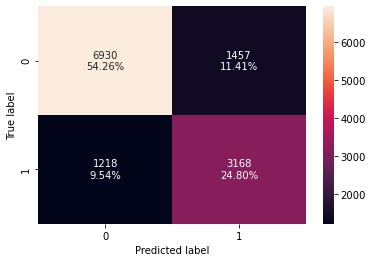

<IPython.core.display.Javascript object>

In [334]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_curve)

In [335]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.790574,0.722298,0.684973,0.703141


<IPython.core.display.Javascript object>

### Model performance summary

In [336]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-0.5 Threshold",
    "Logistic Regression-0.31 Threshold",
    "Logistic Regression-0.40 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-0.5 Threshold,Logistic Regression-0.31 Threshold,Logistic Regression-0.40 Threshold
Accuracy,0.792471,0.771298,0.788612
Recall,0.612316,0.802990,0.715870
Precision,0.731606,0.626961,0.678267
F1,0.666667,0.704141,0.696561


<IPython.core.display.Javascript object>

**Observations on Training data**
* Model with 0.5 threshold gives best Accuracy
* Model with 0.31 threshold from AUC-ROC model gives best Recall
* Model with 0.5 threshold gives best Precision
* F1 score is almost equal for AUC-ROC model (threshold=0.31) and model with threshold=0.40 from Precision/Recall curve

In [337]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-0.5 Threshold",
    "Logistic Regression-0.31 Threshold",
    "Logistic Regression-0.40 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-0.5 Threshold,Logistic Regression-0.31 Threshold,Logistic Regression-0.40 Threshold
Accuracy,0.790574,0.772645,0.790574
Recall,0.611491,0.806430,0.722298
Precision,0.734191,0.632511,0.684973
F1,0.667247,0.708960,0.703141


<IPython.core.display.Javascript object>

**Performance observations on Test data**
* Model with 0.5 threshold and model with threshold=0.40 from Precision/Recall curve give best Accuracy
* Model with 0.31 threshold from AUC-ROC model gives best Recall
* Model with 0.5 threshold gives best Precision
* F1 score is almost equal for AUC-ROC model (threshold=0.31) and model with threshold=0.40 from Precision/Recall curve
* Using the model with default threshold the model will give a low recall but good precision scores - This model will help the bank save resources but lose on potential guests.
* Using the model with 0.31 threshold the model will give a high recall but low precision scores - This model will help the bank identify potential guests effectively but the cost of resources will be high.
* Using the model with 0.40 threshold the model will give a balance recall and precision score - This model will help the bank to maintain a balance in identifying potential customer and the cost of resources.
* Since F1 score is same for models with thresholds=0.31 and 0.40, We can choose the model with the higher Recall. Model with threshold=0.31 gives the highest Recall. 

Performance on Train and Test data are very close to each other. For this project we've to choose the model which gives highest Recall on Test data.

## Logistic Regression model with threshold=0.31 gives the highest Recall of 0.80 on Test data

# Decision Tree

### Preparing data for modeling

In [338]:
print(data["type_of_meal_plan"].value_counts())
print(data["room_type_reserved"].value_counts())
print(data["market_segment_type"].value_counts())


Meal Plan 1     31863
Not Selected     8716
Meal Plan 2      1989
Meal Plan 3         8
Name: type_of_meal_plan, dtype: int64
Room_Type 1    29730
Room_Type 4     9369
Room_Type 6     1540
Room_Type 5      906
Room_Type 2      718
Room_Type 7      307
Room_Type 3        6
Name: room_type_reserved, dtype: int64
Online           34169
Offline           5777
Corporate         1939
Complementary      496
Aviation           195
Name: market_segment_type, dtype: int64


<IPython.core.display.Javascript object>

The above variables are Categorical variables. For each value we will assign numeric values relevent to the data

In [339]:
replaceStruct = {
                "type_of_meal_plan":     {"Meal Plan 1": 1, "Meal Plan 2": 2 ,"Meal Plan 3": 3 ,"Not Selected":-1},
                "room_type_reserved": {"Room_Type 1": 1, "Room_Type 2":2 , "Room_Type 3": 3, "Room_Type 4": 4,"Room_Type 5": 5, "Room_Type 6": 6, "Room_Type 7": 7},
                 "market_segment_type": {"Online": 1, "Offline":2 , "Corporate": 3, "Complementary": 4,"Aviation": 5},
                 }


<IPython.core.display.Javascript object>

In [340]:
data = data.replace(replaceStruct)  # update data with the above numeric values
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,2,0,0,0,65.00,0,0
1,2,0,2,3,-1,0,1,5,2018,11,6,1,0,0,0,106.68,1,0
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,1
3,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0,1
4,3,0,0,3,-1,0,1,271,2019,7,13,1,0,0,0,89.10,2,1


<IPython.core.display.Javascript object>

All columns have numeric values.

### Decision Tree Modeling

In [341]:
X = data.drop("booking_status", axis=1)
y = data.pop("booking_status")

# Splitting training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [342]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.661074
1    0.338926
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.656619
1    0.343381
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

Percentage of 0s and 1s in train and test sets are similar.

In [343]:
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [344]:
print("Accuracy on training set : ", dTree.score(X_train, y_train))
print("Accuracy on test set : ", dTree.score(X_test, y_test))

Accuracy on training set :  0.9967117404288159
Accuracy on test set :  0.79088702732326


<IPython.core.display.Javascript object>

In [345]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [346]:
##  Function to calculate recall score
def get_recall_score(model):
    """
    model : classifier to predict values of X

    """
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    recall_train = metrics.recall_score(y_train, pred_train)
    recall_test = metrics.recall_score(y_test, pred_test)

    acc_train = accuracy_score(y_train, pred_train)  # to compute Accuracy
    acc_test = accuracy_score(y_test, pred_test)

    precision_train = precision_score(y_train, pred_train)  # to compute Precision
    precision_test = precision_score(y_test, pred_test)  # to compute Precision

    f1_train = f1_score(y_train, pred_train)  # to compute F1-score
    f1_test = f1_score(y_test, pred_test)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy_Train": acc_train,
            "Accuracy_Test": acc_test,
            "Recall_Train": recall_train,
            "Recall_Test": recall_test,
            "Precision_train": precision_train,
            "Precision_Test": precision_test,
            "F1_Train": f1_train,
            "F1_Test": f1_test,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

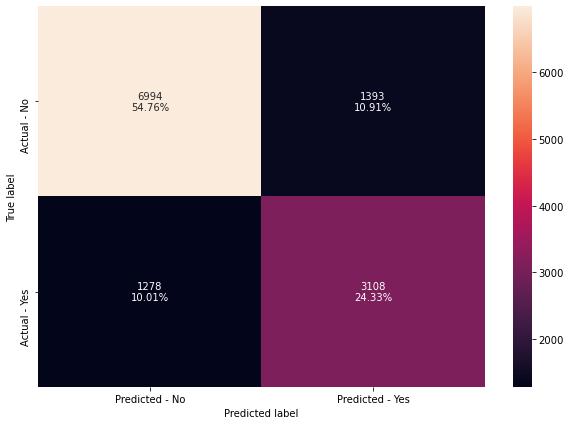

<IPython.core.display.Javascript object>

In [347]:
make_confusion_matrix(dTree, y_test)

In [348]:
# Recall on train and test
decision_tree_perf = get_recall_score(dTree)
decision_tree_perf

,Accuracy_Train,Accuracy_Test,Recall_Train,Recall_Test,Precision_train,Precision_Test,F1_Train,F1_Test
0,0.996712,0.790887,0.990298,0.708618,1.0,0.690513,0.995125,0.699449


<IPython.core.display.Javascript object>

In [349]:
feature_names = list(X.columns)
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


<IPython.core.display.Javascript object>

In [350]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type <= 1.50
|   |   |   |--- lead_time <= 9.50
|   |   |   |   |--- avg_price_per_room <= 202.67
|   |   |   |   |   |--- lead_time <= 2.50
|   |   |   |   |   |   |--- no_of_week_nights <= 8.50
|   |   |   |   |   |   |   |--- arrival_month <= 1.50
|   |   |   |   |   |   |   |   |--- weights: [100.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- arrival_month >  1.50
|   |   |   |   |   |   |   |   |--- arrival_month <= 9.50
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 91.04
|   |   |   |   |   |   |   |   |   |   |--- type_of_meal_plan <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- type_of_meal_plan >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  91.04
|   |   |   |   |   |   |   |   | 

<IPython.core.display.Javascript object>

In [351]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dTree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.342159
avg_price_per_room                    0.151812
no_of_special_requests                0.098477
arrival_date                          0.094990
market_segment_type                   0.079951
arrival_month                         0.066383
no_of_week_nights                     0.057685
no_of_weekend_nights                  0.034261
arrival_year                          0.016856
no_of_adults                          0.015456
room_type_reserved                    0.013673
type_of_meal_plan                     0.012940
required_car_parking_space            0.007819
no_of_children                        0.006742
no_of_previous_bookings_not_canceled  0.000348
repeated_guest                        0.000327
no_of_previous_cancellations          0.000121


<IPython.core.display.Javascript object>

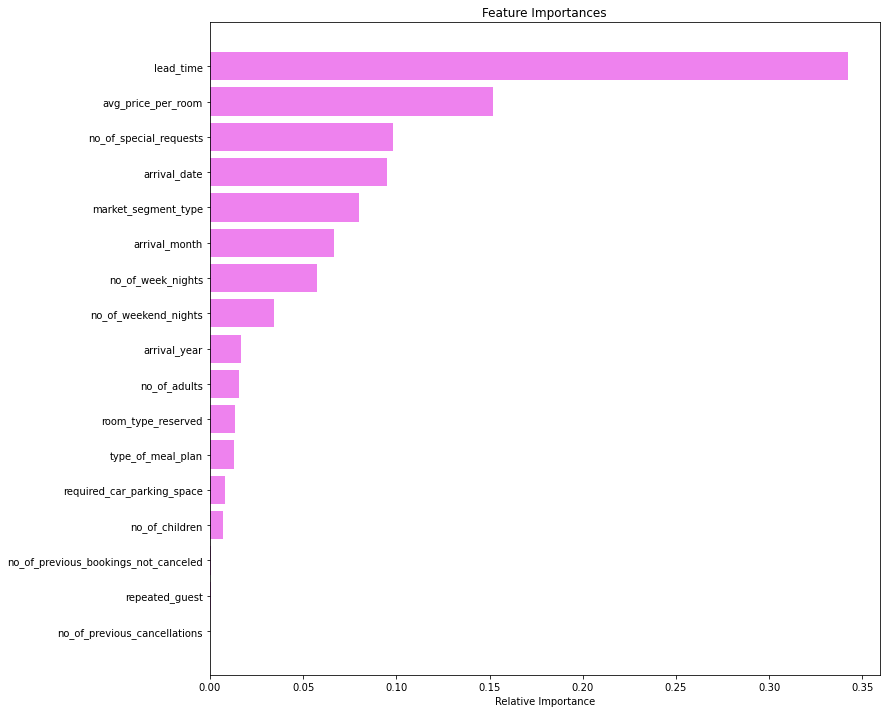

<IPython.core.display.Javascript object>

In [352]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the Decision Tree model lead_time is the most important for predicting the booking_status followed by avg_price_per_room, no_of_special_requests, arrival_date, market_segment_type.
* Recall on Train data is 0.99 and Test data is 0.70

**The tree above is very complex, such a tree often overfits.**

## Reducing over fitting

* In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits
  and it captures more information about the data and this is one of the root causes of overfitting
* Let's try Limiting the max_depth of tree to 3

In [353]:
dTree1 = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

<IPython.core.display.Javascript object>

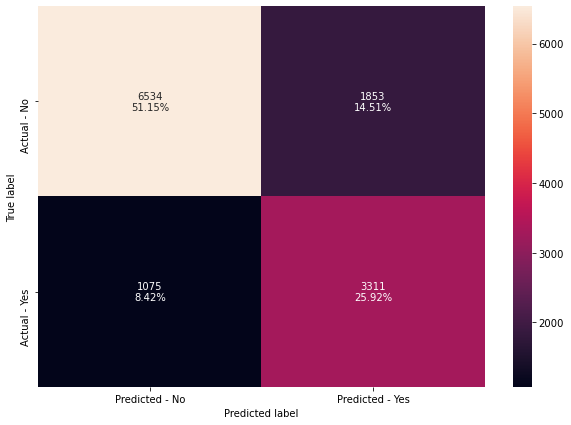

<IPython.core.display.Javascript object>

In [354]:
make_confusion_matrix(dTree1, y_test)

In [355]:
# Accuracy on train and test
print("Accuracy on training set : ", dTree1.score(X_train, y_train))
print("Accuracy on test set : ", dTree1.score(X_test, y_test))
# Recall on train and test
decision_tree_maxdepth = get_recall_score(dTree1)
decision_tree_maxdepth

Accuracy on training set :  0.7710968694426735
Accuracy on test set :  0.7707664605026228


,Accuracy_Train,Accuracy_Test,Recall_Train,Recall_Test,Precision_train,Precision_Test,F1_Train,F1_Test
0,0.771097,0.770766,0.748045,0.754902,0.638553,0.64117,0.688976,0.693403


<IPython.core.display.Javascript object>

## Visualizing the Decision Tree

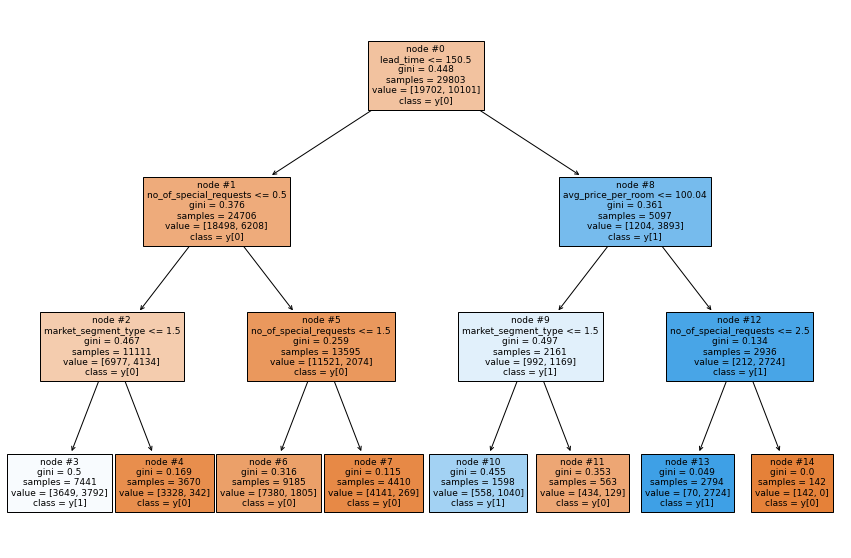

<IPython.core.display.Javascript object>

In [356]:
plt.figure(figsize=(15, 10))

tree.plot_tree(
    dTree1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [357]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree1, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type <= 1.50
|   |   |   |--- weights: [3649.00, 3792.00] class: 1
|   |   |--- market_segment_type >  1.50
|   |   |   |--- weights: [3328.00, 342.00] class: 0
|   |--- no_of_special_requests >  0.50
|   |   |--- no_of_special_requests <= 1.50
|   |   |   |--- weights: [7380.00, 1805.00] class: 0
|   |   |--- no_of_special_requests >  1.50
|   |   |   |--- weights: [4141.00, 269.00] class: 0
|--- lead_time >  150.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- market_segment_type <= 1.50
|   |   |   |--- weights: [558.00, 1040.00] class: 1
|   |   |--- market_segment_type >  1.50
|   |   |   |--- weights: [434.00, 129.00] class: 0
|   |--- avg_price_per_room >  100.04
|   |   |--- no_of_special_requests <= 2.50
|   |   |   |--- weights: [70.00, 2724.00] class: 1
|   |   |--- no_of_special_requests >  2.50
|   |   |   |--- weights: [142.00, 0.00] class: 0



<IPython.core.display.Javascript object>

In [358]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dTree1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.488032
market_segment_type                   0.219967
no_of_special_requests                0.210089
avg_price_per_room                    0.081912
arrival_month                         0.000000
no_of_previous_bookings_not_canceled  0.000000
no_of_previous_cancellations          0.000000
repeated_guest                        0.000000
arrival_date                          0.000000
no_of_adults                          0.000000
no_of_children                        0.000000
room_type_reserved                    0.000000
required_car_parking_space            0.000000
type_of_meal_plan                     0.000000
no_of_week_nights                     0.000000
no_of_weekend_nights                  0.000000
arrival_year                          0.000000


<IPython.core.display.Javascript object>

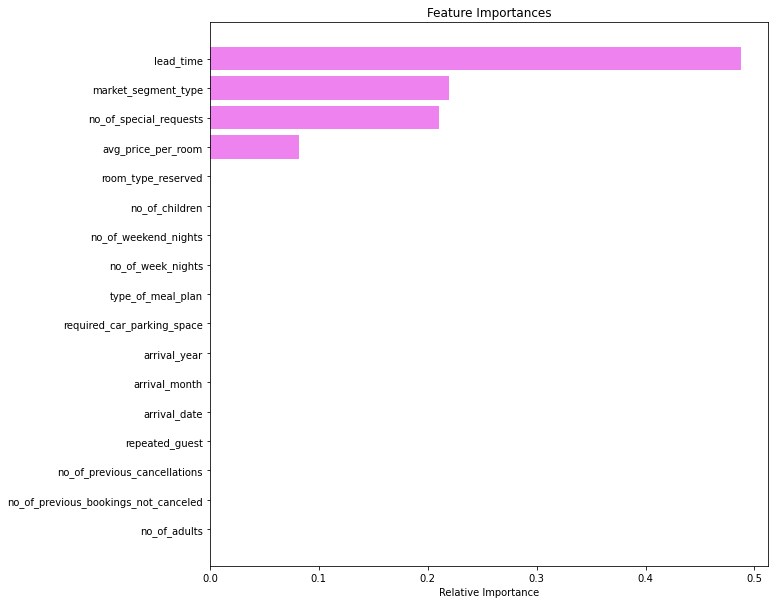

<IPython.core.display.Javascript object>

In [359]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

*******************************************************************************************************************************
* Recall is 0.75 and only 4 variables have importances.
* That's why we will go for pre pruning using grid search, maybe setting max_depth to 3 is not good enough
* It is bad to have a very low depth because your model will underfit 
* Let's see how to find the best values

### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [360]:
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

In [361]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "max_depth": [np.arange(4, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.0001,
                       random_state=1)

<IPython.core.display.Javascript object>

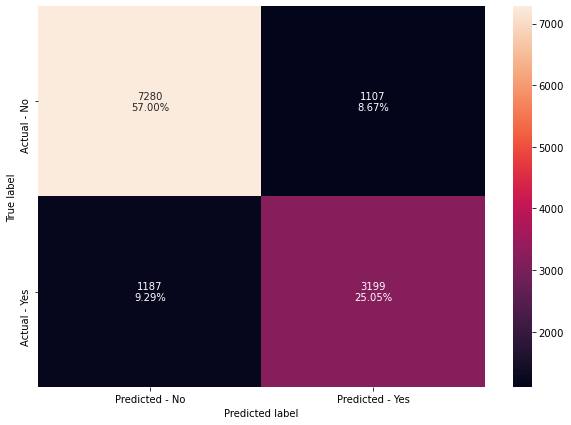

<IPython.core.display.Javascript object>

In [362]:
make_confusion_matrix(estimator, y_test)

In [363]:
# Accuracy on train and test
print("Accuracy on training set : ", estimator.score(X_train, y_train))
print("Accuracy on test set : ", estimator.score(X_test, y_test))
# Recall on train and test
decision_tree_tune_perf = get_recall_score(estimator)
decision_tree_tune_perf

Accuracy on training set :  0.8852464516994933
Accuracy on test set :  0.8204024113364128


,Accuracy_Train,Accuracy_Test,Recall_Train,Recall_Test,Precision_train,Precision_Test,F1_Train,F1_Test
0,0.885246,0.820402,0.817345,0.729366,0.839792,0.742917,0.828417,0.736079


<IPython.core.display.Javascript object>

In [364]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type <= 1.50
|   |   |   |--- lead_time <= 9.50
|   |   |   |   |--- avg_price_per_room <= 202.67
|   |   |   |   |   |--- lead_time <= 2.50
|   |   |   |   |   |   |--- arrival_month <= 1.50
|   |   |   |   |   |   |   |--- weights: [100.00, 0.00] class: 0
|   |   |   |   |   |   |--- arrival_month >  1.50
|   |   |   |   |   |   |   |--- arrival_month <= 9.50
|   |   |   |   |   |   |   |   |--- no_of_week_nights <= 7.50
|   |   |   |   |   |   |   |   |   |--- weights: [467.00, 50.00] class: 0
|   |   |   |   |   |   |   |   |--- no_of_week_nights >  7.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |--- arrival_month >  9.50
|   |   |   |   |   |   |   |   |--- lead_time <= 1.50
|   |   |   |   |   |   |   |   |   |--- weights: [96.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- lead_time >  1.50
|   |   |   |   |   |   |   |   

<IPython.core.display.Javascript object>

In [365]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                           Imp
lead_time                             0.348003
no_of_special_requests                0.162146
avg_price_per_room                    0.142335
market_segment_type                   0.111812
arrival_month                         0.079886
arrival_date                          0.043579
no_of_week_nights                     0.035350
no_of_weekend_nights                  0.019557
arrival_year                          0.017186
required_car_parking_space            0.012910
type_of_meal_plan                     0.009155
room_type_reserved                    0.008407
no_of_adults                          0.005884
no_of_children                        0.001874
repeated_guest                        0.001623
no_of_previous_bookings_not_canceled  0.000293
no_of_previous_cancellations          0.000000


<IPython.core.display.Javascript object>

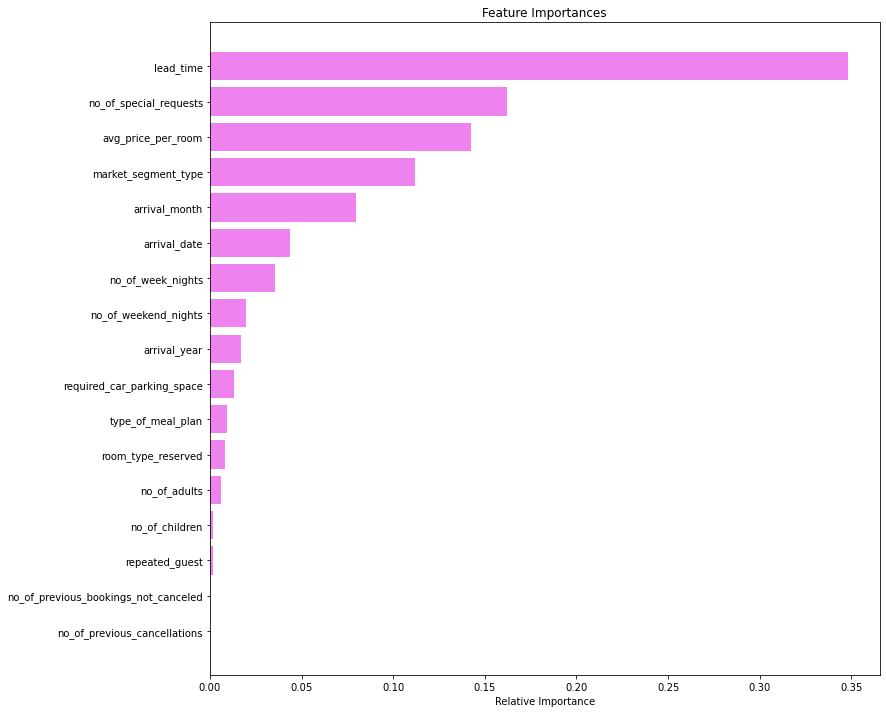

<IPython.core.display.Javascript object>

In [366]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Almost all nodes have importances. 
This shows that hyperparameter tuning using Grid Search is better than randomly limiting a Hyperparameter

* Recall has reduced to 0.72 on Test data.
* But post pruning might give even better results, since there is quite a good possibility that we might neglect some hyperparameters, post pruning will take care of all that.

## Cost Complexity Pruning


The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.


In [367]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [368]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.003288
1,0.000000,0.003288
2,0.000000,0.003288
3,0.000000,0.003288
4,0.000000,0.003288
...,...,...
2012,0.008620,0.300276
2013,0.012485,0.312761
2014,0.012501,0.325262
2015,0.024185,0.373632


<IPython.core.display.Javascript object>

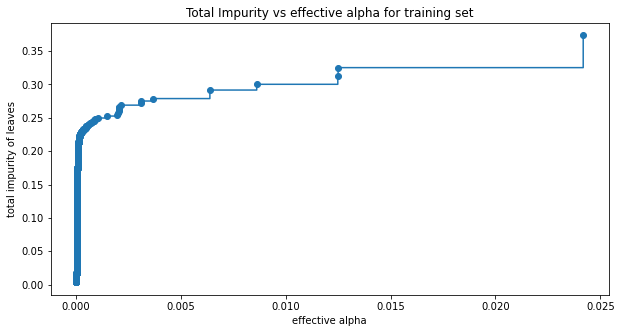

<IPython.core.display.Javascript object>

In [369]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [370]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1,
        ccp_alpha=ccp_alpha,
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0744779578733411


<IPython.core.display.Javascript object>


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

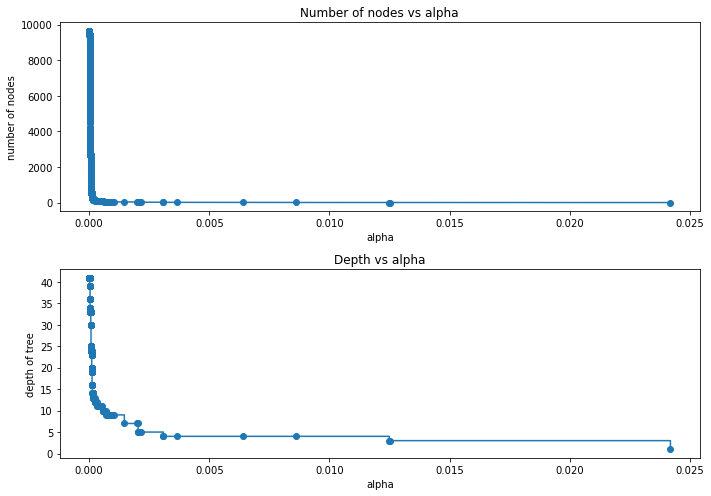

<IPython.core.display.Javascript object>

In [371]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Accuracy vs alpha for training and testing sets
----------------------------------------------------
When ``ccp_alpha`` is set to zero and keeping the other default parameters
of `DecisionTreeClassifier`, the tree overfits, leading to
a 100% training accuracy and 69% testing accuracy. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.

In [372]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

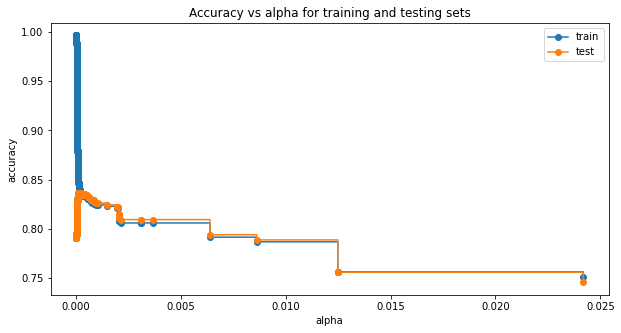

<IPython.core.display.Javascript object>

In [373]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [374]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print("Training accuracy of best model: ", best_model.score(X_train, y_train))
print("Test accuracy of best model: ", best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.00012280932854770042, random_state=1)
Training accuracy of best model:  0.8466597322417206
Test accuracy of best model:  0.8362170202771471


<IPython.core.display.Javascript object>

#### Since accuracy isn't the right metric for our data we would want high recall

In [375]:
recall_train = []
for clf in clfs:
    pred_train3 = clf.predict(X_train)
    values_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [376]:
recall_test = []
for clf in clfs:
    pred_test3 = clf.predict(X_test)
    values_test = metrics.recall_score(y_test, pred_test3)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

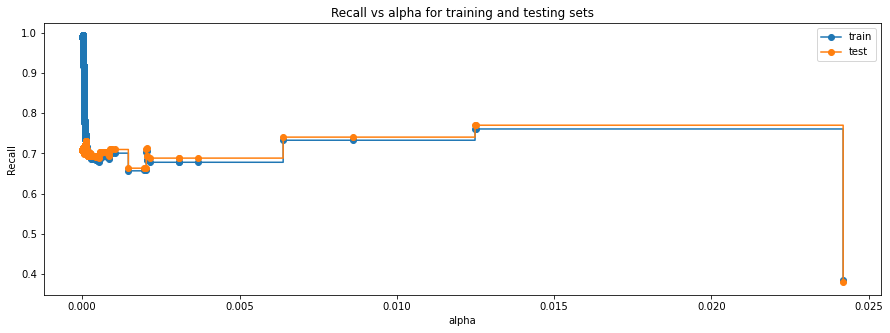

<IPython.core.display.Javascript object>

In [377]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [378]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.012485002220168628, random_state=1)


<IPython.core.display.Javascript object>

In [379]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.012485002220168628, random_state=1)

<IPython.core.display.Javascript object>

## Confusion Matrix - post-pruned decision tree

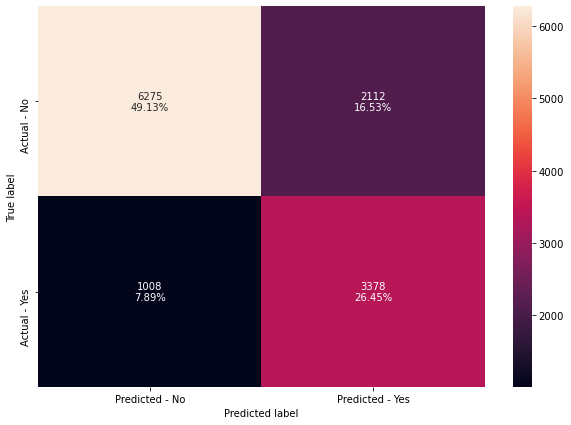

<IPython.core.display.Javascript object>

In [380]:
make_confusion_matrix(best_model, y_test)

In [381]:
# Recall on train and test
decision_tree_cc = get_recall_score(best_model)
decision_tree_cc

,Accuracy_Train,Accuracy_Test,Recall_Train,Recall_Test,Precision_train,Precision_Test,F1_Train,F1_Test
0,0.756098,0.755735,0.760816,0.770178,0.612937,0.615301,0.678917,0.684083


<IPython.core.display.Javascript object>

## Visualizing the Decision Tree

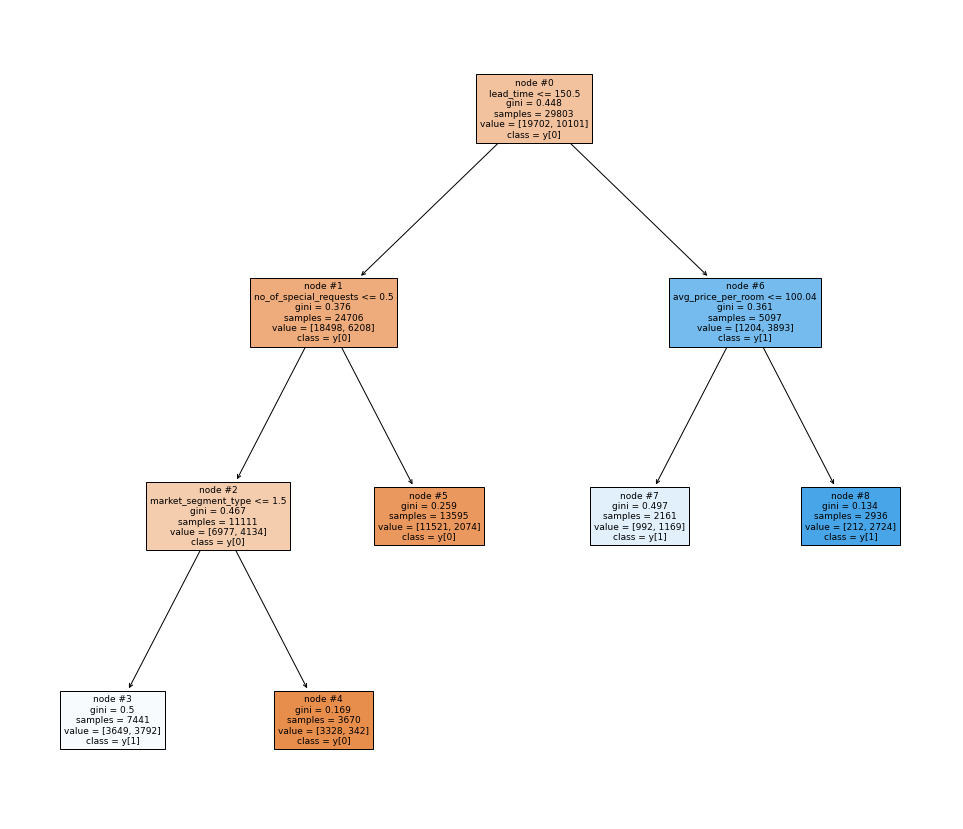

<IPython.core.display.Javascript object>

In [382]:
plt.figure(figsize=(17, 15))

tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [383]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type <= 1.50
|   |   |   |--- weights: [3649.00, 3792.00] class: 1
|   |   |--- market_segment_type >  1.50
|   |   |   |--- weights: [3328.00, 342.00] class: 0
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [11521.00, 2074.00] class: 0
|--- lead_time >  150.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [992.00, 1169.00] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [212.00, 2724.00] class: 1



<IPython.core.display.Javascript object>

In [384]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.550266
market_segment_type                   0.211312
no_of_special_requests                0.146064
avg_price_per_room                    0.092358
arrival_month                         0.000000
no_of_previous_bookings_not_canceled  0.000000
no_of_previous_cancellations          0.000000
repeated_guest                        0.000000
arrival_date                          0.000000
no_of_adults                          0.000000
no_of_children                        0.000000
room_type_reserved                    0.000000
required_car_parking_space            0.000000
type_of_meal_plan                     0.000000
no_of_week_nights                     0.000000
no_of_weekend_nights                  0.000000
arrival_year                          0.000000


<IPython.core.display.Javascript object>

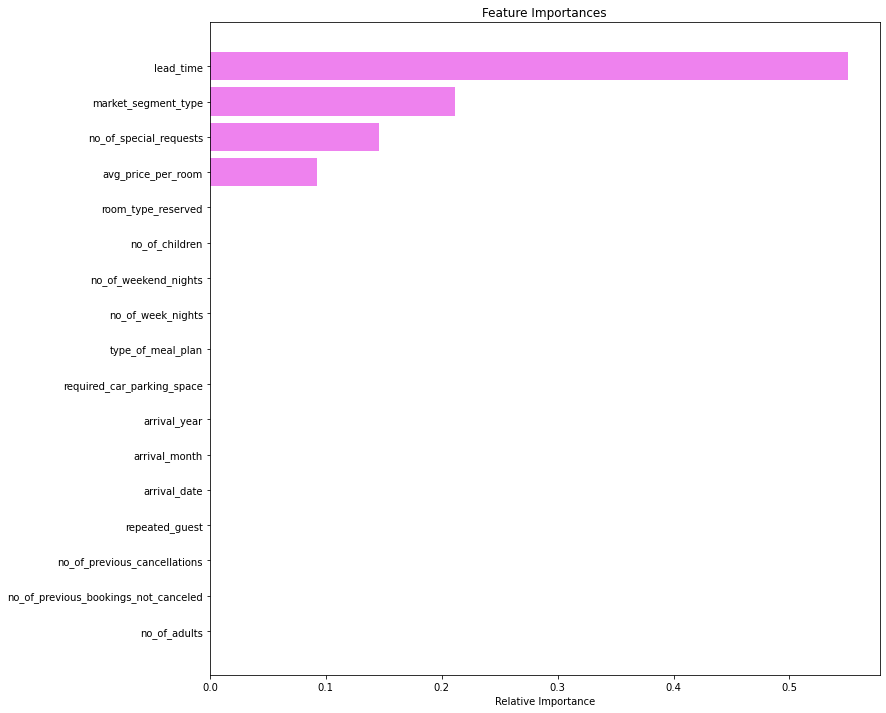

<IPython.core.display.Javascript object>

In [385]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

This is a very simple tree. We can try with the alpha which gives next lower recall value.

**Creating model with 0.006 ccp_alpha**

In [386]:
best_model2 = DecisionTreeClassifier(ccp_alpha=0.006, random_state=1)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.006, random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on the training set

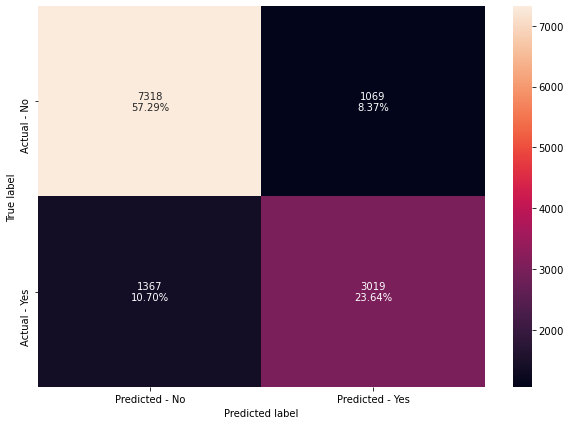

<IPython.core.display.Javascript object>

In [387]:
make_confusion_matrix(best_model2, y_test)

In [388]:
# Recall on train and test
decision_tree_cc2 = get_recall_score(best_model2)
decision_tree_cc2

,Accuracy_Train,Accuracy_Test,Recall_Train,Recall_Test,Precision_train,Precision_Test,F1_Train,F1_Test
0,0.805858,0.809285,0.677953,0.688326,0.729986,0.738503,0.703008,0.712532


<IPython.core.display.Javascript object>

* Accuracy has improved from the initial model. 
* Tree is better with not too many levels.
* The model is giving a generalized performance on training and test set.

### Visualizing the Decision Tree

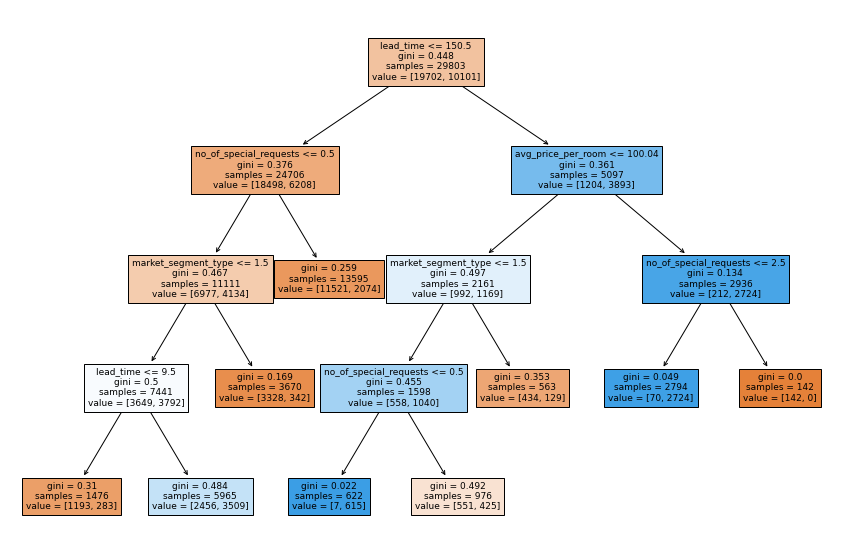

<IPython.core.display.Javascript object>

In [389]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [390]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type <= 1.50
|   |   |   |--- lead_time <= 9.50
|   |   |   |   |--- weights: [1193.00, 283.00] class: 0
|   |   |   |--- lead_time >  9.50
|   |   |   |   |--- weights: [2456.00, 3509.00] class: 1
|   |   |--- market_segment_type >  1.50
|   |   |   |--- weights: [3328.00, 342.00] class: 0
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [11521.00, 2074.00] class: 0
|--- lead_time >  150.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- market_segment_type <= 1.50
|   |   |   |--- no_of_special_requests <= 0.50
|   |   |   |   |--- weights: [7.00, 615.00] class: 1
|   |   |   |--- no_of_special_requests >  0.50
|   |   |   |   |--- weights: [551.00, 425.00] class: 0
|   |   |--- market_segment_type >  1.50
|   |   |   |--- weights: [434.00, 129.00] class: 0
|   |--- avg_price_per_room >  100.04
|   |   |--- no_of_special_requests <= 2.50
|   |   |   |--- weights: [70.00, 2724.

<IPython.core.display.Javascript object>

In [391]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.513886
no_of_special_requests                0.213879
market_segment_type                   0.198366
avg_price_per_room                    0.073869
arrival_month                         0.000000
no_of_previous_bookings_not_canceled  0.000000
no_of_previous_cancellations          0.000000
repeated_guest                        0.000000
arrival_date                          0.000000
no_of_adults                          0.000000
no_of_children                        0.000000
room_type_reserved                    0.000000
required_car_parking_space            0.000000
type_of_meal_plan                     0.000000
no_of_week_nights                     0.000000
no_of_weekend_nights                  0.000000
arrival_year                          0.000000


<IPython.core.display.Javascript object>

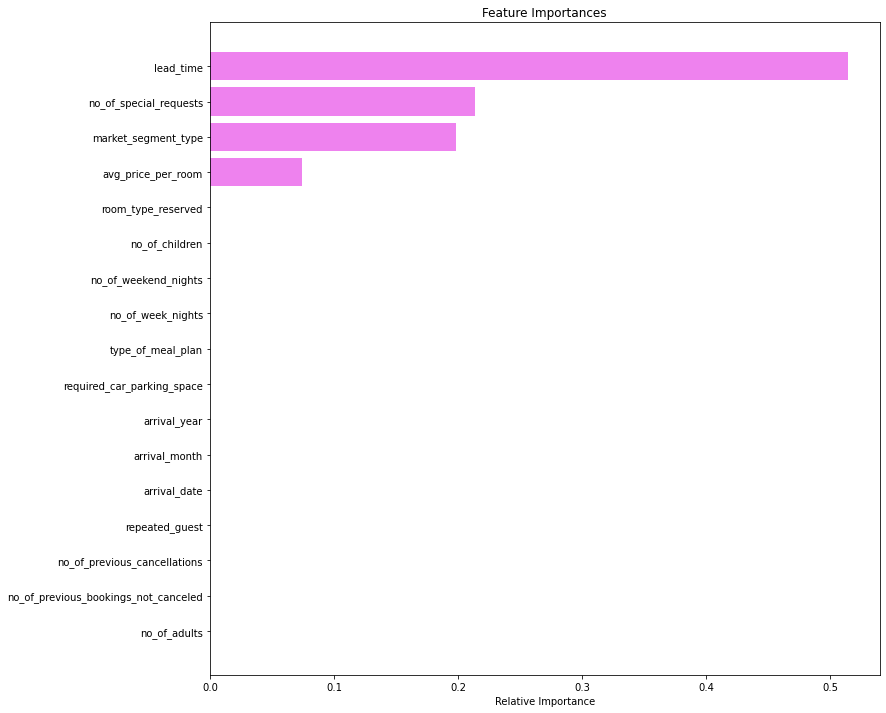

<IPython.core.display.Javascript object>

In [392]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Comparing all the decision tree models

In [393]:
# performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf.T,
        decision_tree_maxdepth.T,
        decision_tree_tune_perf.T,
        decision_tree_cc.T,
        decision_tree_cc2.T
    ],
    axis=1,
    
)

models_train_comp_df.columns=["Initial", "Max_depth=3","Hyperparameter","CC Pruning","CC Pruning_2"]
    
print("Performance comparison:")
models_train_comp_df



Performance comparison:


,Initial,Max_depth=3,Hyperparameter,CC Pruning,CC Pruning_2
Accuracy_Train,0.996712,0.771097,0.885246,0.756098,0.805858
Accuracy_Test,0.790887,0.770766,0.820402,0.755735,0.809285
Recall_Train,0.990298,0.748045,0.817345,0.760816,0.677953
Recall_Test,0.708618,0.754902,0.729366,0.770178,0.688326
Precision_train,1.000000,0.638553,0.839792,0.612937,0.729986
Precision_Test,0.690513,0.641170,0.742917,0.615301,0.738503
F1_Train,0.995125,0.688976,0.828417,0.678917,0.703008
F1_Test,0.699449,0.693403,0.736079,0.684083,0.712532


<IPython.core.display.Javascript object>

**Performance Observations on Train and Test data**
* Initial tree is very complex with a Recall score of 0.99 on Train and 0.70 on Test. It will overfit the noise also.
* Recall increases to 0.75 (Test data) on the pre-pruned tree with max_depth=3. The tree is too simple and might underfit.
* Recall decreases to 0.72 (Test data) on the Model with Hyperparameters.
* By Post-pruning the tree, we get alpha=0.012 which gives best recall of 0.77 on test data. The tree is still simple with 3 levels.
* By post-pruning the tree with the next best alpha=0.002 we get a lower recall of 0.688 on test data. The tree is neither too complex nor too simple. 

- We analyzed the "Star Hotels" using different techniques and used Decision Tree Classifier to build a predictive model for the same.
- The model built can be used to predict if a guest is going to cancel a booking or not.
- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
- lead_time, no_of_special_requests, market_segment_type, avg_price_per_room are the most important variable in predicting the guests that will Cancel a booking. 
- We established the importance of hyper-parameters/ pruning to reduce overfitting.

## Actionable Insights & Recommendations

### Comparision of Logistic Regression and Decision Tree modeling

**Logistic Regression**
* Data preparation such has removing multicollinearity between dependent variables and checking p-values to make sure there is correlation between independent and dependent variables.
* Need to test for logistic regression assumptions.
* Once the initial model is built, coefficients remain the same. Other models can be built by just varying the threshold to get the best metric scores.
* Doesn't take much time to build the models.

**Decision Tree**
* No data preparation is needed. It doesn't matter if variables are dependent on each other or not.
* No need to check for any assumptions.
* For each model, a number of parameters can be varied to get the best metric scores. Parameters can be set before the tree is built (Hyperparametrs in Pre-pruning). Tree can be pruned after it is fully grown. Each model will give different importances to variables.
* Grid search with Hyperparameters to get the best combination of parameters; pruning the tree to find the best tree - both takes a lot of time to finish.

### Insights and key takeaways

* In both classification models lead_time is an important deciding factor. An increase in lead_time will increase the chances of the booking getting cancelled.
* avg_price_per_room also has a positive influence in cancellation. If avg_price_per_room increases, chances of booking getting cancelled will increase. 
* Bookings with higher number of special requests have a lower chance of getting cancelled.
* Market segment type also influences the booking status. None of the complementary bookings are cancelled and most of the cancellations happen in Online segment. 
* Logistic regression model takes less time to run. 
* In Logistic regression, only the threshold needs to be changed to find different models while in Decision tree there are many parameters which can be changed and also can be pre-pruned or post-pruned. With so many options, finding the best tree is very time consuming.

For this project we've to choose the model which gives highest Recall on Test data. By comparing the Recall scores of all models and that logistic regression is more simpler, we can conclude that 

## Logistic Regression model with threshold=0.31 gives the highest Recall of 0.80 on Test data

### Cancellation Policies

Refund amount=% of original price for for less than 4 guests:

     Days prior arrival   Less than 4 days of stay    More than 4 days of stay
 
      > 10                       90%                    80%
 
      2-10                       70%                    70%
 
      < 2                        60%                    50%
      

Refund amount=% of original price for for more than 4 guests:

     Days prior arrival   Less than 4 days of stay    More than 4 days of stay
 
      > 10                       85%                    75%
 
      2-10                       65%                    65%
      
      < 2                        55%                    45%


### Recommendations

* Since both lead_time and avg_price_per room influence the booking status, offers can be made to those who book with a lead_time less than 100 days (or 3 months) by giving a discount in prices.
* Repeated guests can be offered Complementary bookings based on number of previous bookings with good Meal plans. This will encourage guests to come more often.
* Entertainment programs can be conducted during school vacation periods which will attract guests with children to stay at least for few days. 
* Room_type_3 is the least expensive and least chosen room. It could be made more attractive by offering free special requests if that room is booked. 
* Guests from Corporate segment stay for few days for their business work. They can be offered special coupons to be used in future when they come with their family.
* Guests from Aviation segment can be given offers if booked as a group. Group bookings will be attractive to the guests as they can stay together at one place and will not have any problem with coordinating their acivities. 
* Offline bookings can be increased by offering discounts if paid by cash. 
* To attract new customers current guests can be offered free breakfast/other meals if they recommend this hotel to their friends (and the friend makes a confirmed booking).  
* Since Online segment has most number of guests, Advertisements with upcoming events and offers can be shared with the guests to their emails and social media accounts.
* Guests can be given special points if they post about their stay at the hotel in social media. The accumulated points can be used in future for room services. 

### Conclusion

* A thorough EDA was done on the data and was processed for classification model building.
* Linear regression was done with default threshold=0.5
* Models with thresholds from AUC_ROC and Precision-Recall were made. Model with threshold=0.31 from AUC-ROC curve gave the best Recall.
* Initial Decision Tree was built. 
* Pre-pruning with max_depth=3, GridSearch with Hyperparameters were done and different trees were built.
* Cost Complexity Post-pruning was done and 2 trees were built with alpha values giving the best threshold and next best lower threshold. 
* For the above models of decision trees, categorical data was converted to numeric by:
> assigning values to each category; Creating dummies by One-Hot encoding.

>Both types gave almost the same results (equal upto first 2 decimal places)

* After comparing all above models,  Linear Regression Model with threshold=0.31 from AUC-ROC curve gave the best Recall.
* With further information such as purpose of stay, form of payment, etc more analysis can be done and a more accurate model can be built to predict if a guest will cancel their booking or not
